# Análisis de correspondencias Proyecto Caracterización demográfica.

## Referentes

https://www.r-bloggers.com/pca-and-k-means-clustering-of-delta-aircraft/

http://eric.univ-lyon2.fr/~ricco/cours/slides/en/classif_variables_quali.pdf



In [1]:
# Libraries
library (ggplot2)
#install.packages("scatterplot3d", repos='https://cloud.r-project.org')
library(scatterplot3d)
getmode= function(v){
    uniquev=unique(v)
    uniquev[which.max(tabulate(match(v,uniquev)))]
}

Warning message:
: package 'scatterplot3d' was built under R version 3.3.2

# PENDIENTES

- Asignar valores de facotres a variables
- Eliminar valores nulos (reemplazar por promedio o por moda)
- Clusters por K-Medias
- Clusters por PCA


## Carga test files

In [2]:
test1=read.csv(file="2016-10-29_DatosEncuesta.csv",header = T, fileEncoding = "UTF-8")
rownames(test1)=test1[,1]
test1=test1[,-1]
print(ncol(test1))

[1] 109


## Variables Priorizadas

In [3]:
test_full=test1
var_import=c(3,4,8,32,34,35,38,39,41,42,43,53,61,62,68,70,71,72,73,75,105,106,107)
test2=test1[,var_import]
colnames(test2)
#test1=test2

[1] "edad"           "sexo"           "poblacin_esp"   "lug_trabajo"   
 [5] "ing_mensual"    "grupo_fliar"    "profesin_padre" "educacin_padre"
 [9] "profesin_madre" "educacin_madre" "educa_pareja"   "prof_mayores1" 
[13] "profesin_hnos2" "profesin_hnos3" "otra_carrera"   "mot_calidad"   
[17] "mot_costo"      "mot_beneficio"  "mot_gusto"      "mot_personal"  
[21] "costos"         "calidad"        "modalidad"

### Transformar variables en factores

In [4]:
# test2$sexo=factor(test2$sexo,levels=c(1,2),labels = c("Femenino","Masculino"))
# test2$poblacin_esp = factor (test2$poblacin_esp,levels=c(0,1,2,3,4,5,6,7),labels=c(
#     "No pertenece","Madre cabeza de familia","Padre cabeza de familia","Indígena","Reinsertado","Desplazado","Adulto Mayor","LGBTI"
# ))

# test2$lug_trabajo = factor (test2$lug_trabajo,levels=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),labels=c(
#     "No aplica","Servicios Generales","ETB","Microempresa","Colegio","Universidad","ISIVEN ANDINA","Independiente","Banco","Fiscalía","Constructora","Consultora Recursos Humanos","Hacienda","Acueducto","DERALAM SAS"
# ))

# test2$ing_mensual = factor (test2$ing_mensual,levels=c(0,1,2,3,4,5,6,7),labels=c(
#     "No aplica","Menos de un salario mínimo","De 1 a 2 SMMLV","De 2 a 3 SMMLV","De 4 a 5 SMMLV","De 5 a 6 SMMLV","De 6 a 7 SMMLV","Más de 7 SMMLV"
# ))


# # ########
# # test2$ = factor (test2$,
# #                  levels = c(),
# #                  labels=c("")
# #                 )


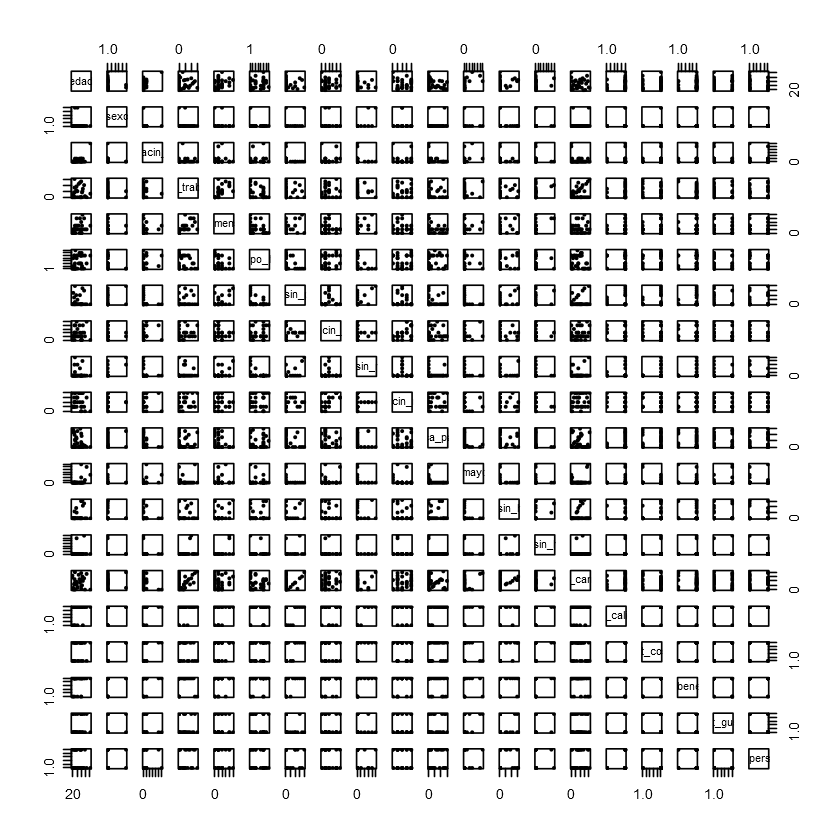

In [5]:
pairs(test2[1:20],cex=0.5,pch=16)

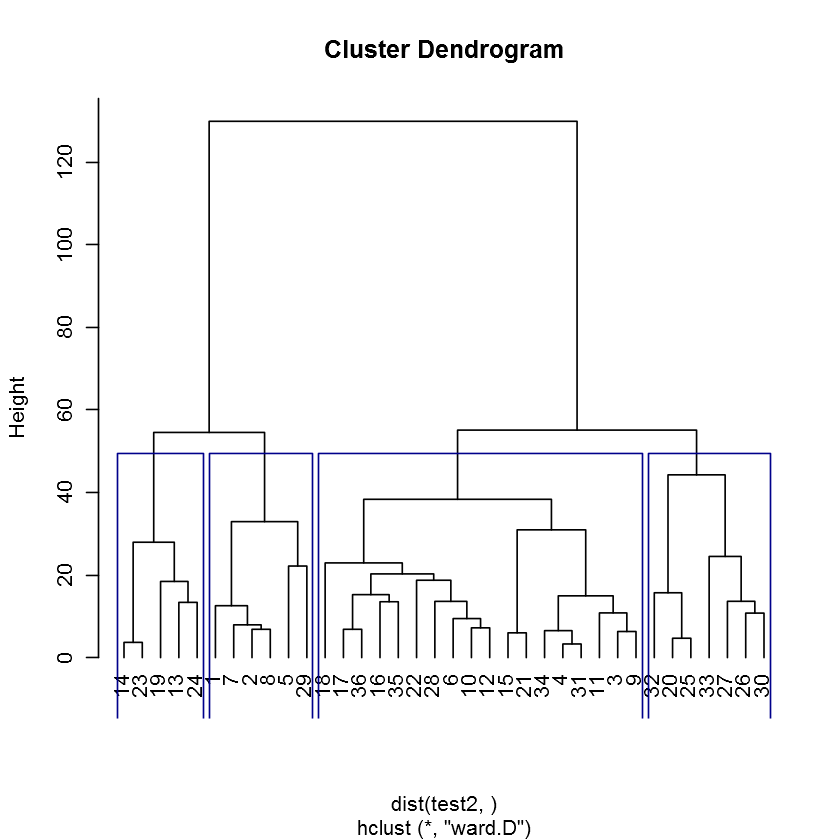

In [6]:
dend_test1=hclust(dist(test2,),method="ward.D")
plot(dend_test1,hang=-1)
groups <- cutree(dend_test1, k=4) 
rect.hclust(dend_test1, k=4, border="darkblue") 

In [7]:
varnames=c("Años cumplidos",
"Sexo biológico",
"Pertenencia a una población especial",
"Lugar de trabajo",
"Valor de ingreso mensual",
"Grupo familiar actual",
"Profesión padre",
"Nivel Educativo Padre",
"Profesión madre",
"Nivel Educativo madre",
"Importancia de educación profesional en pareja actual o futura",
"Profesión Hijos mayores de Edad",
"Profesión Hermanos",
"Profesión Hermanos",
"Carreras estudiadas diferentes antes de ingresar a UVD",
"Eligió su carrera por calidad",
"Eligió su carrera por costo",
"Eligió su carrera por beneficios",
"Eligió su carrera porque siempre le ha gustado",
"Eligió su carrera por interés personal",
"Estudia en UVD por costos",
"Estudia en UVD por calidad",
"Estudia en UVD por modalidad"
)

## Perfiles para todas las variables

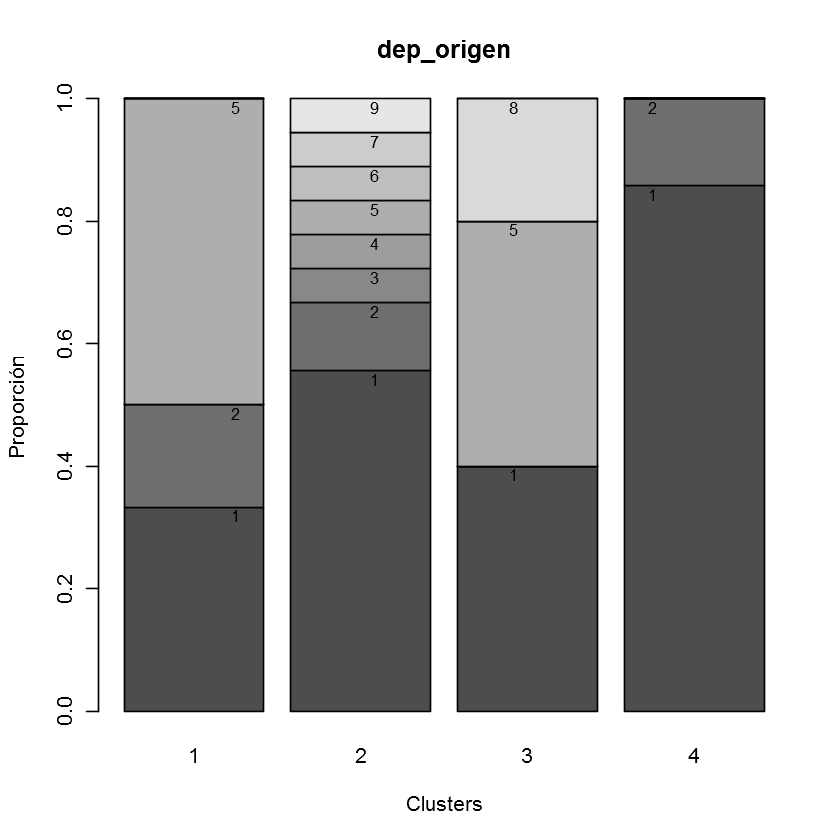

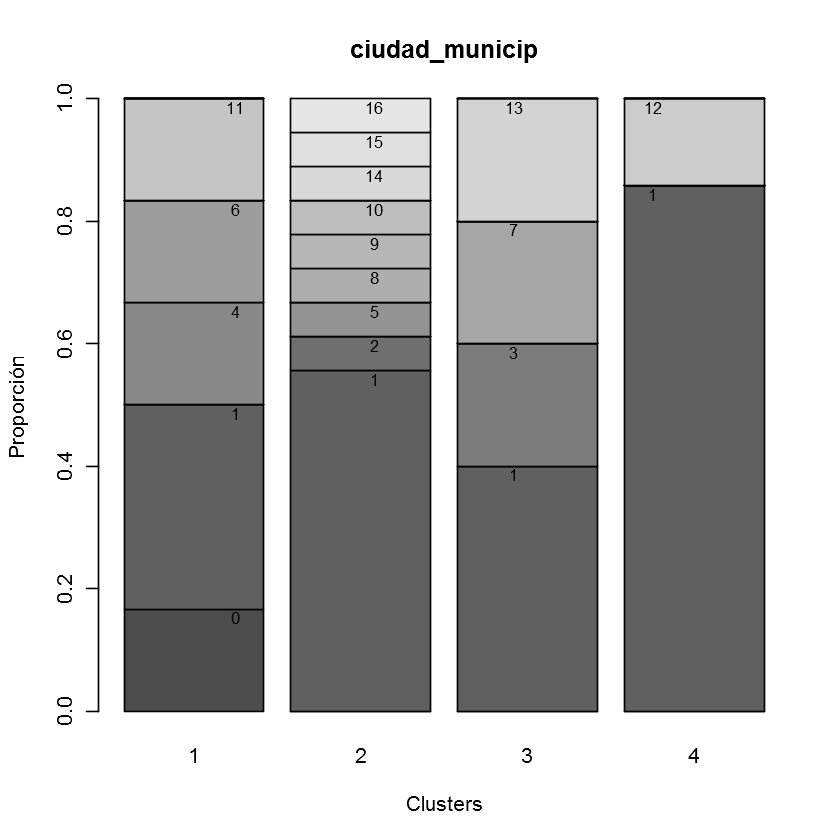

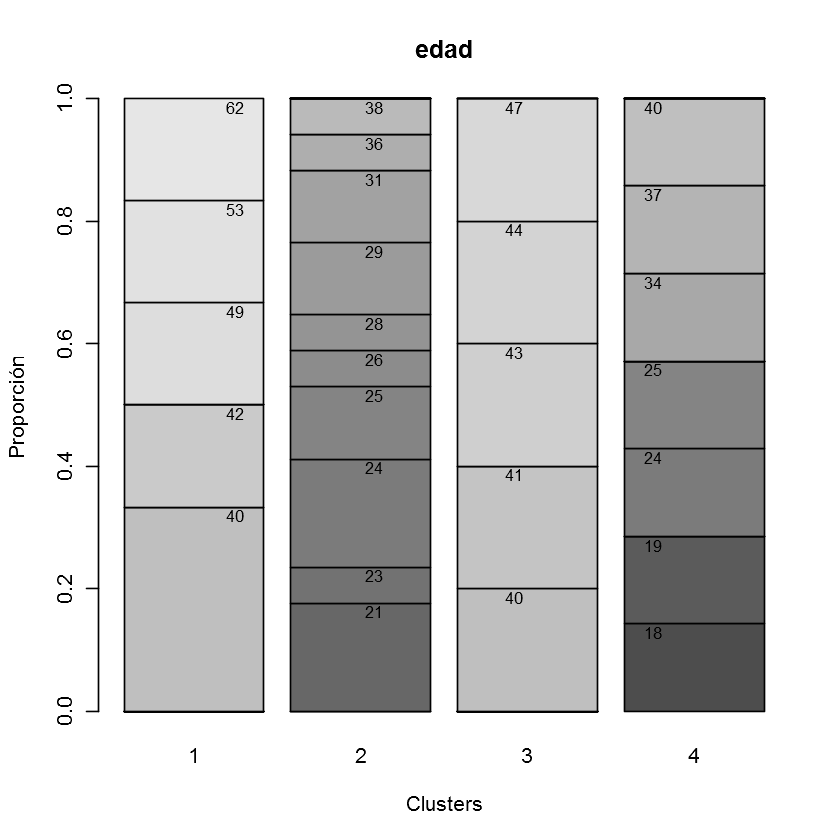

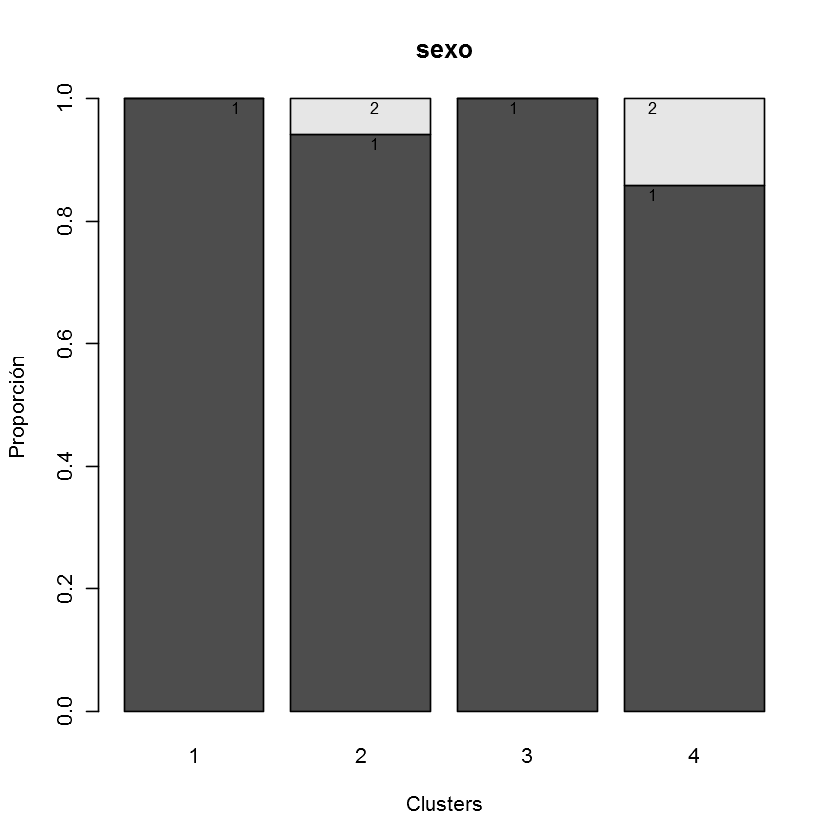

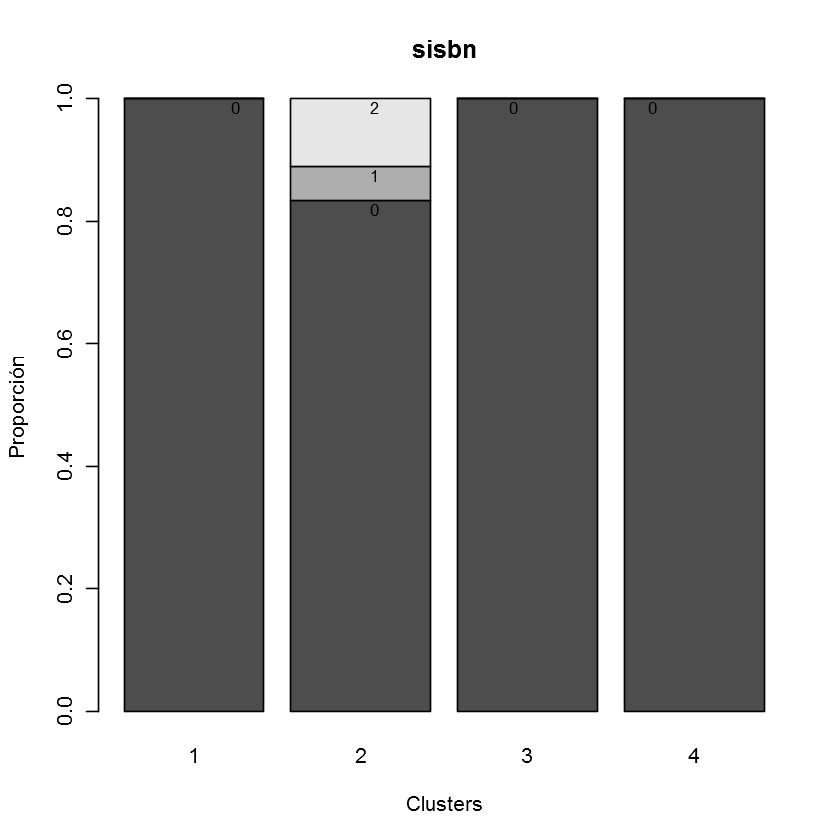

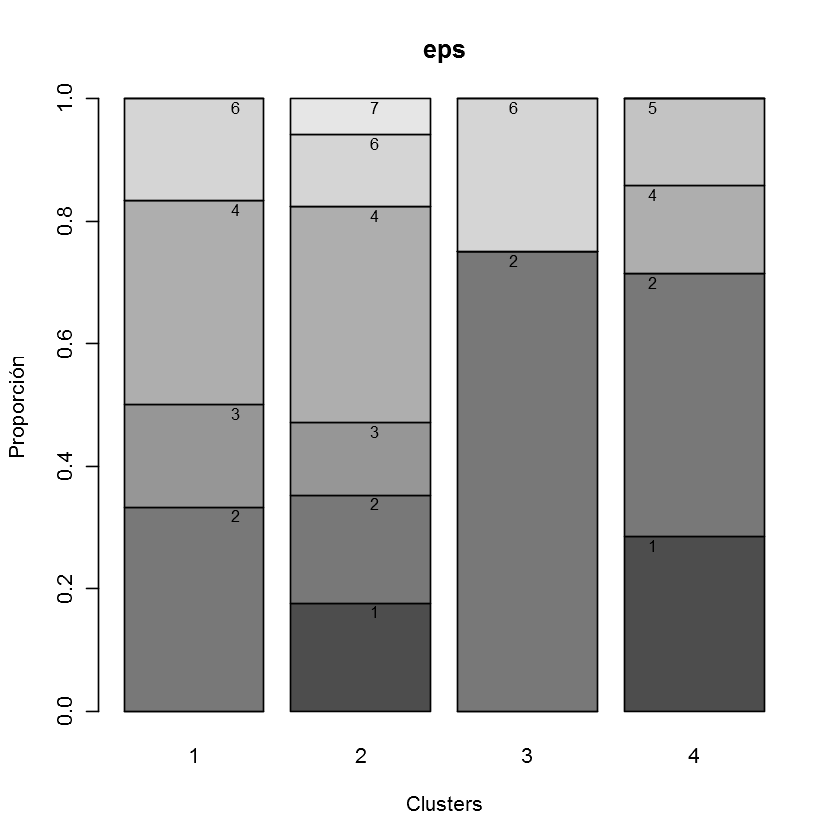

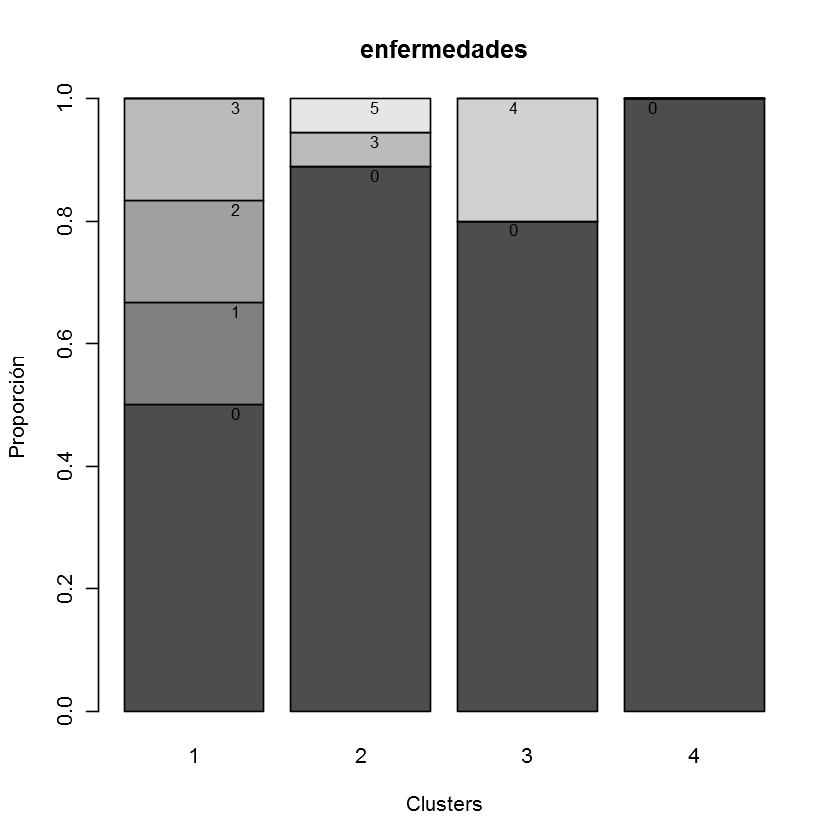

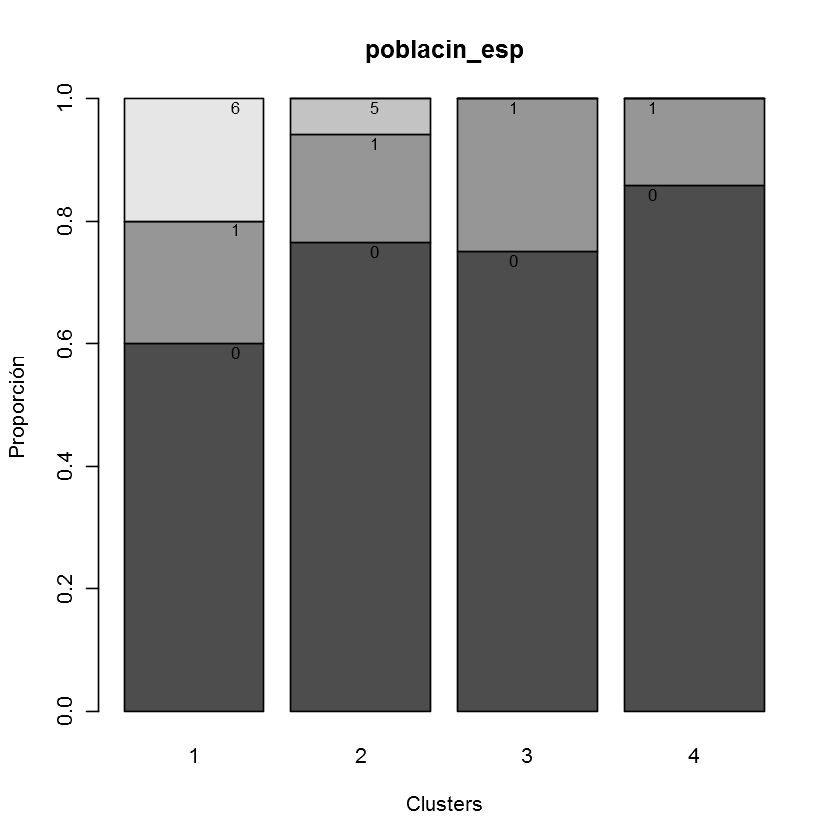

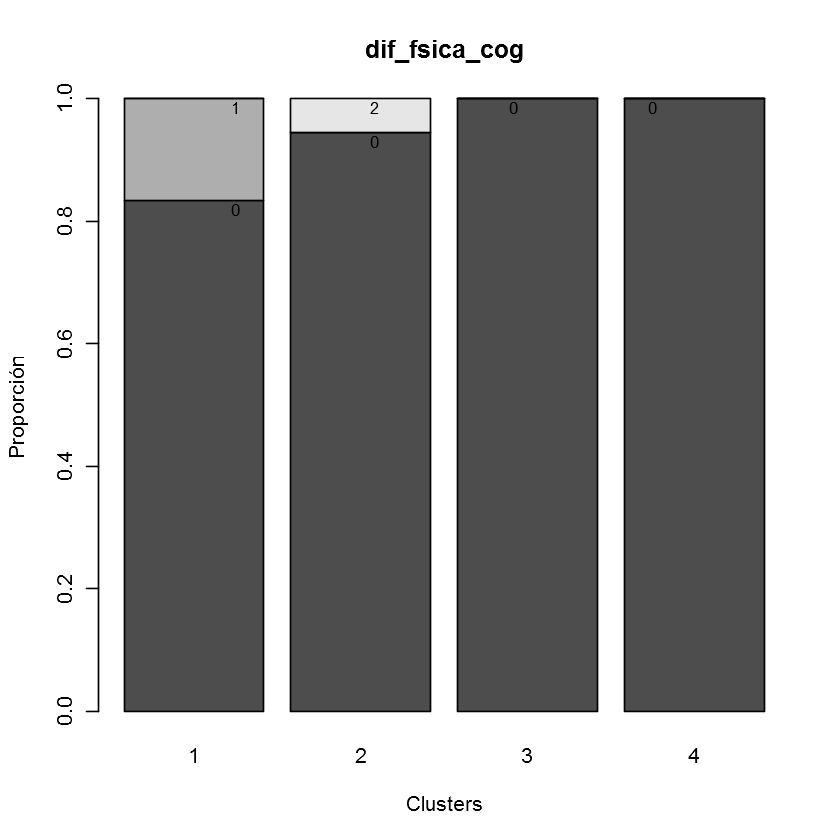

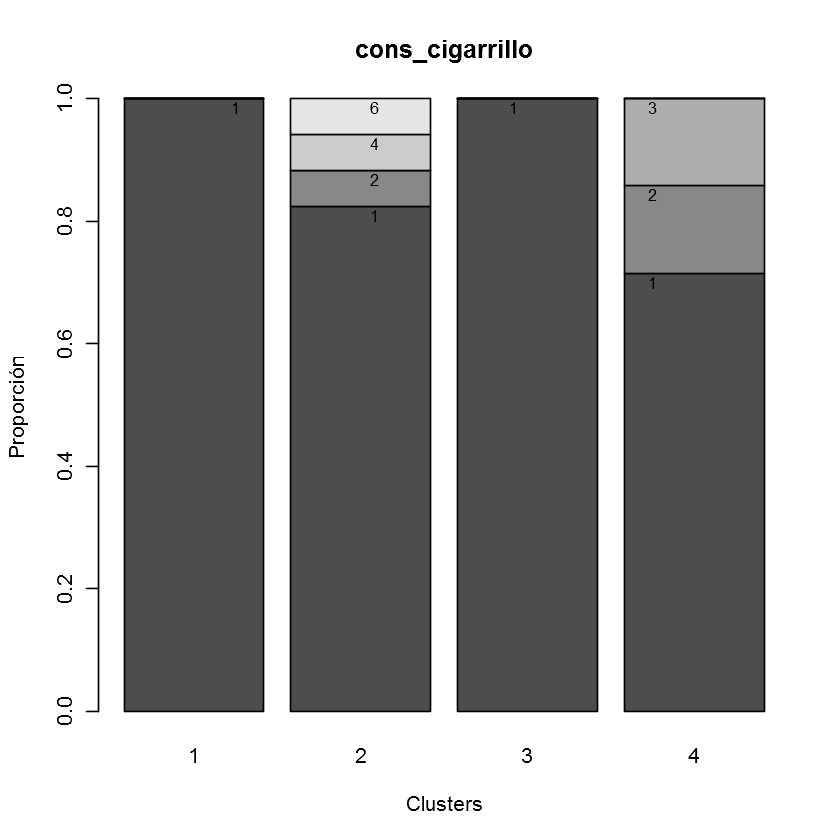

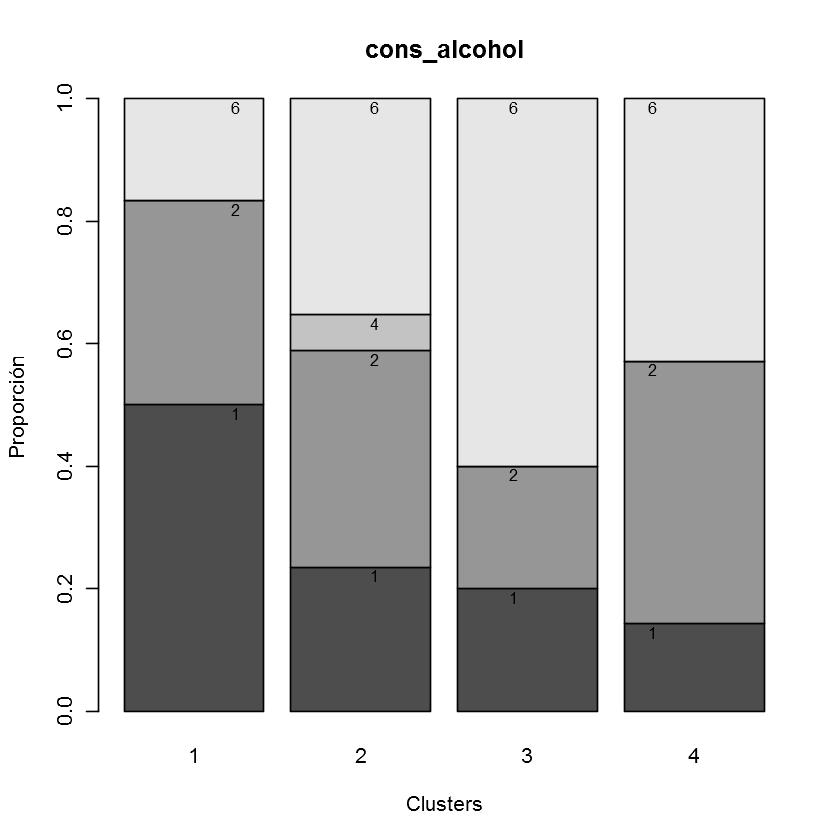

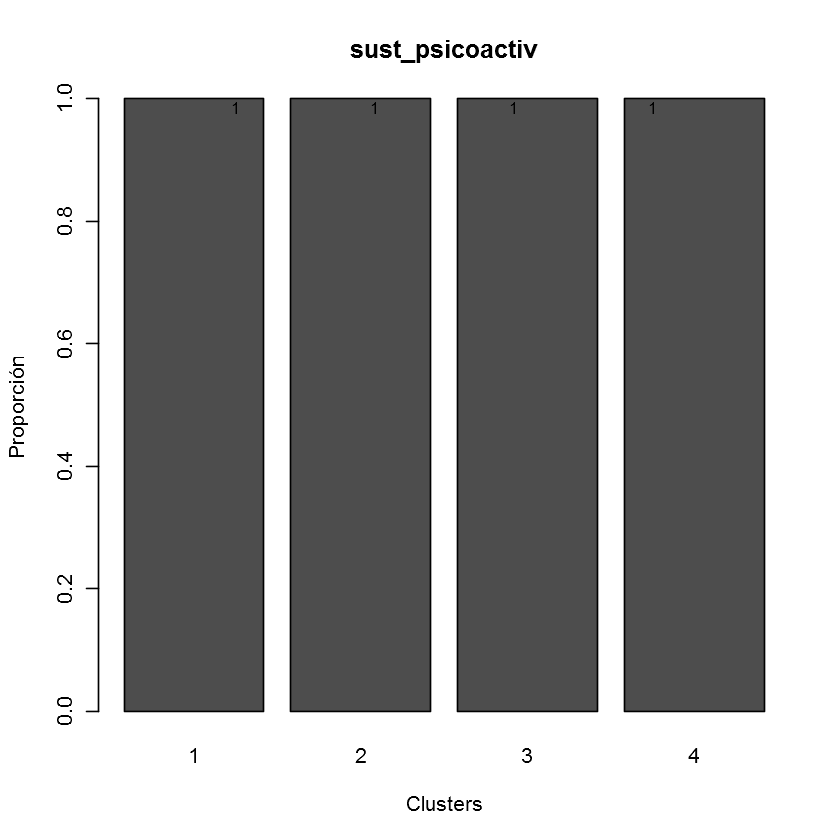

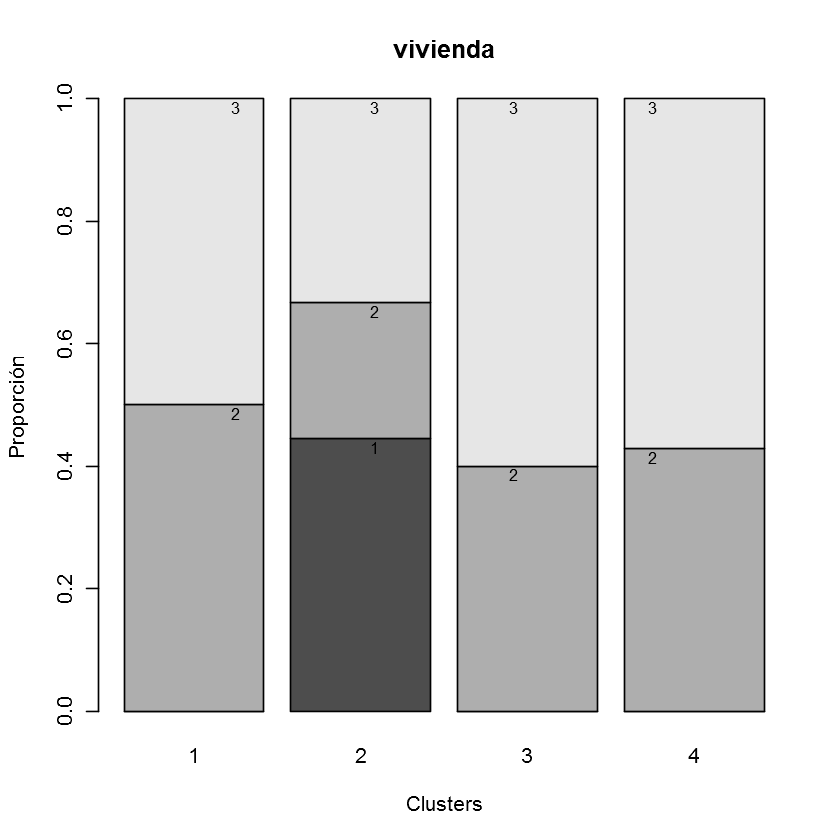

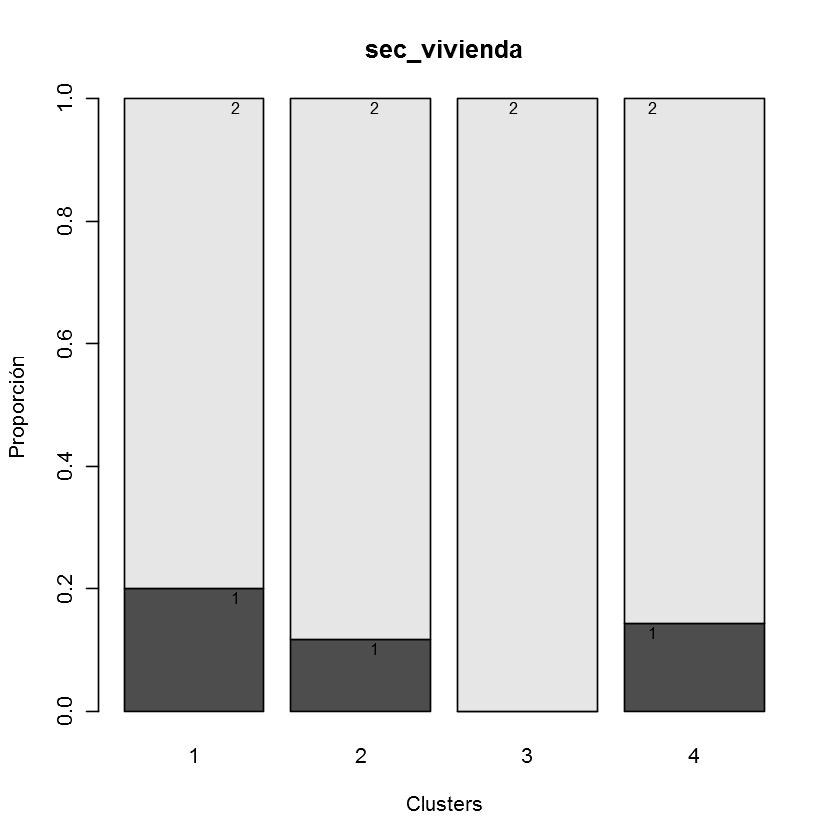

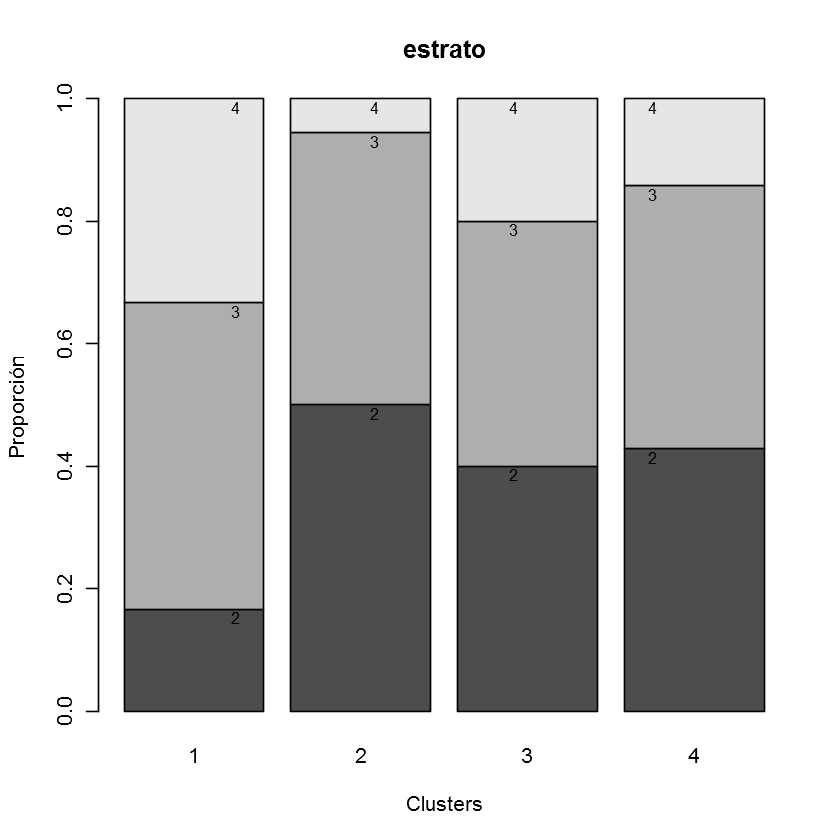

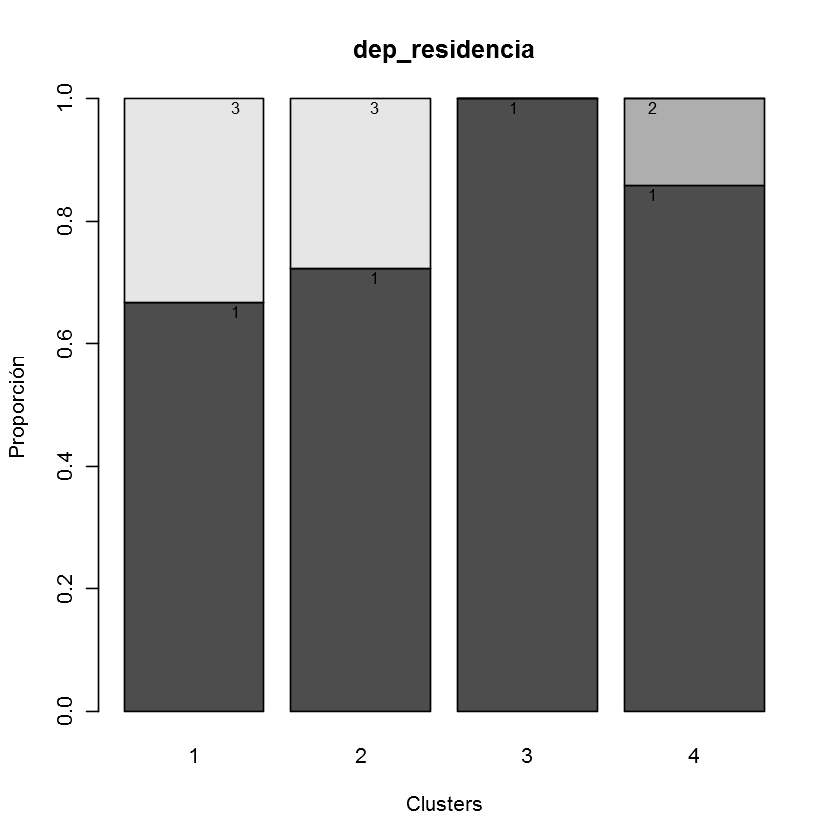

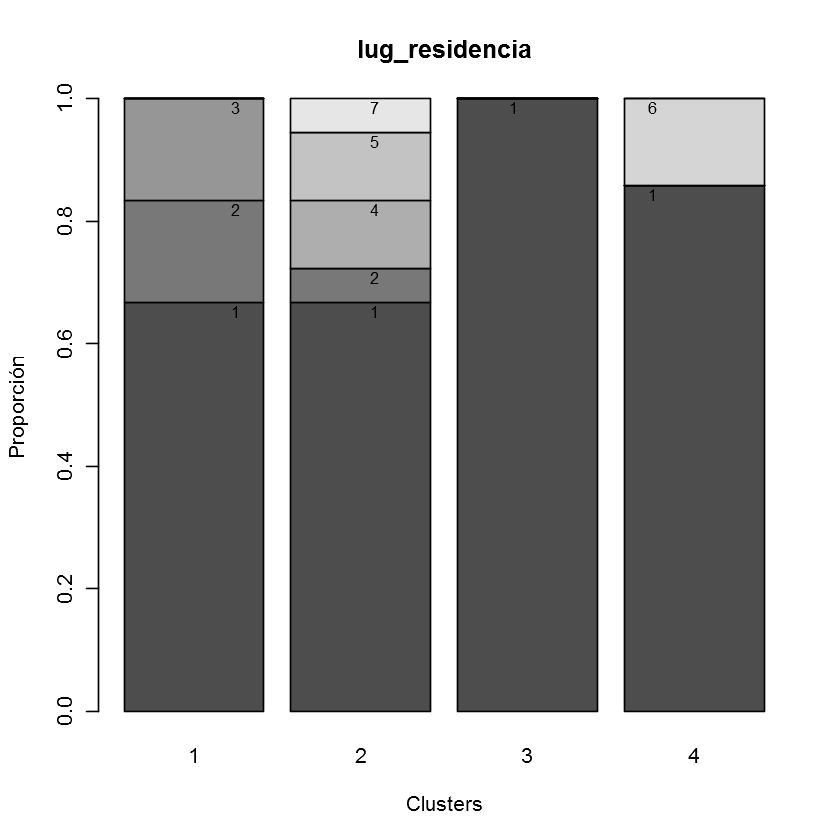

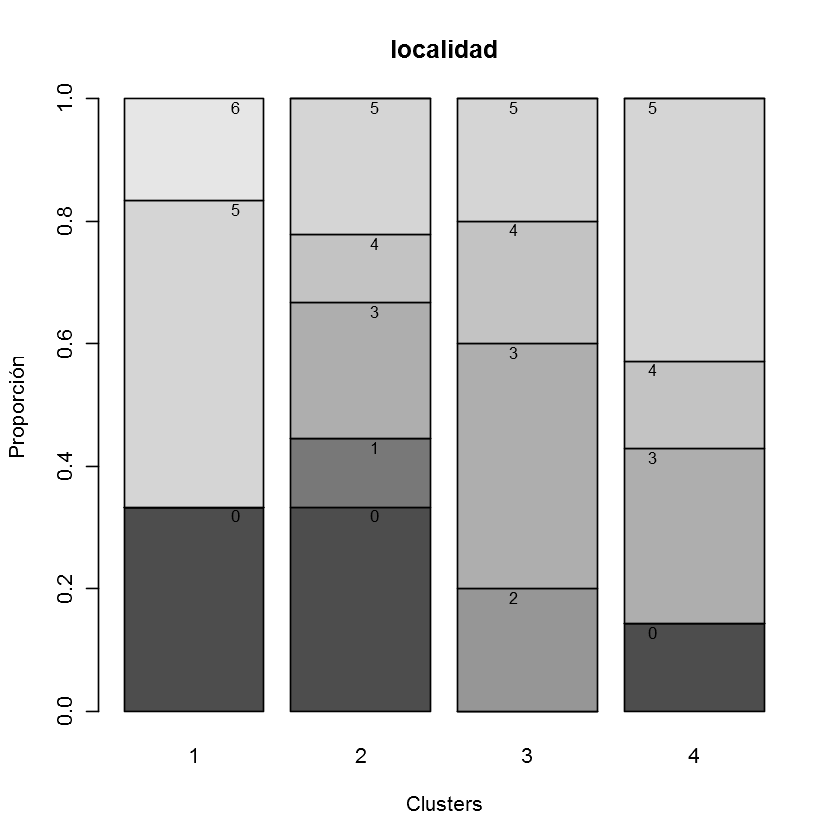

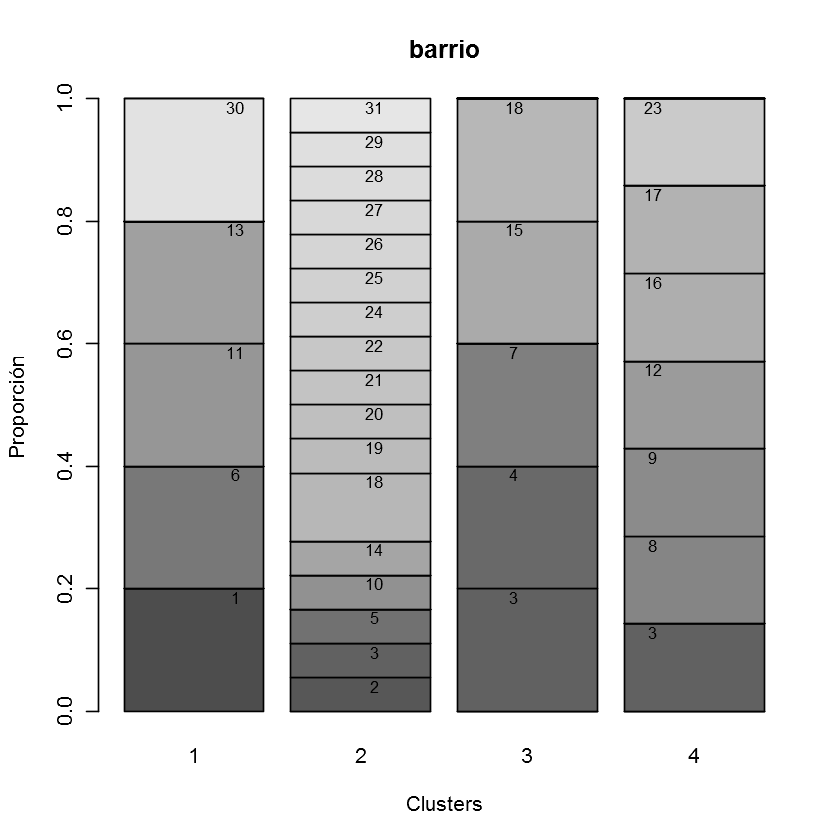

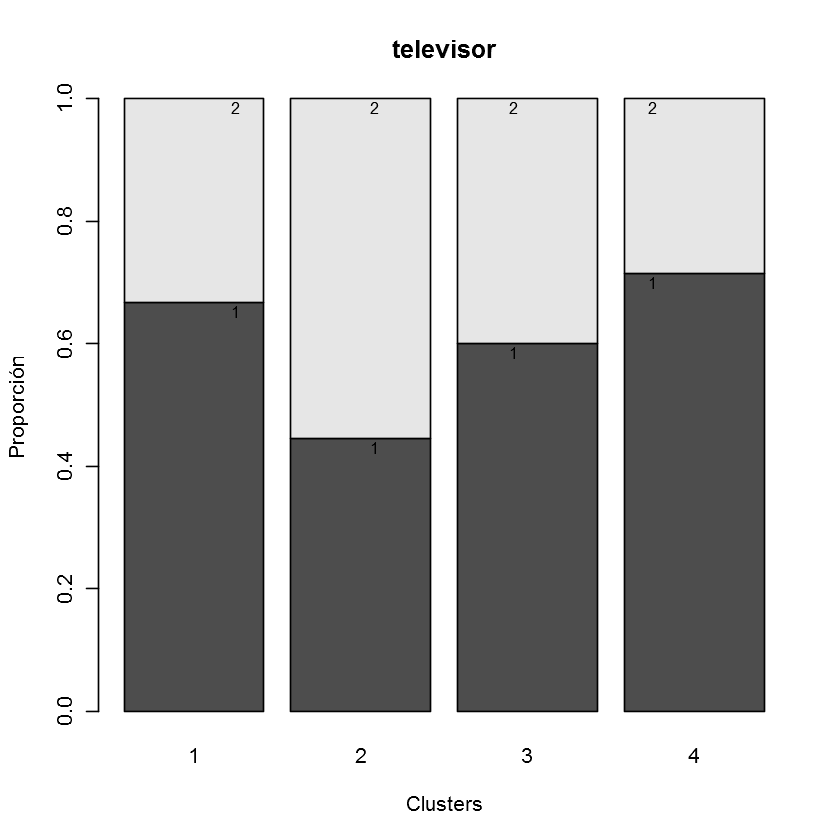

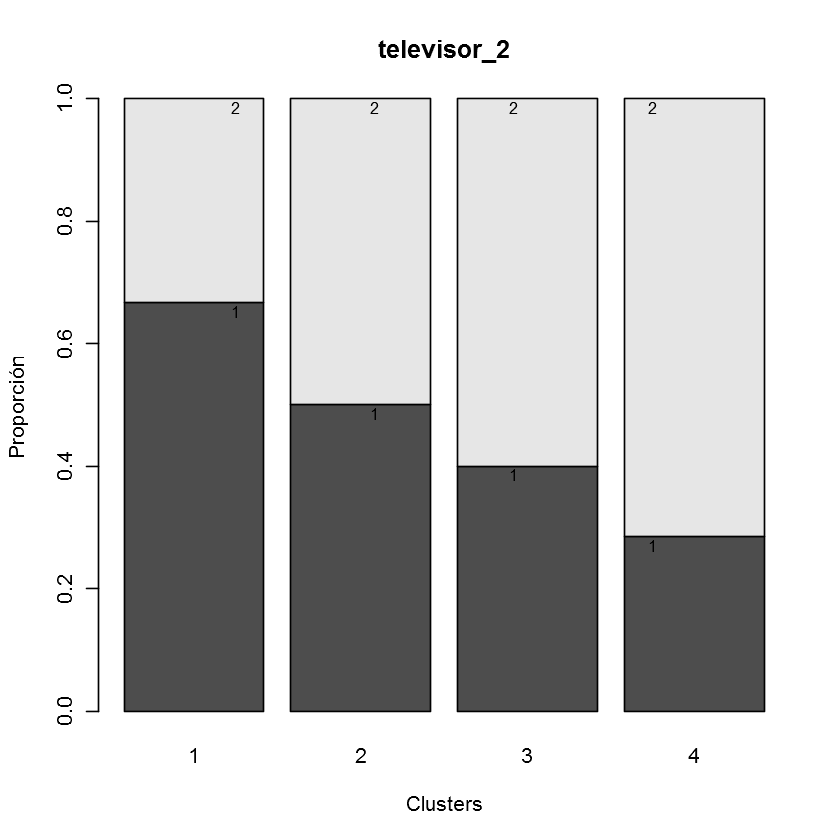

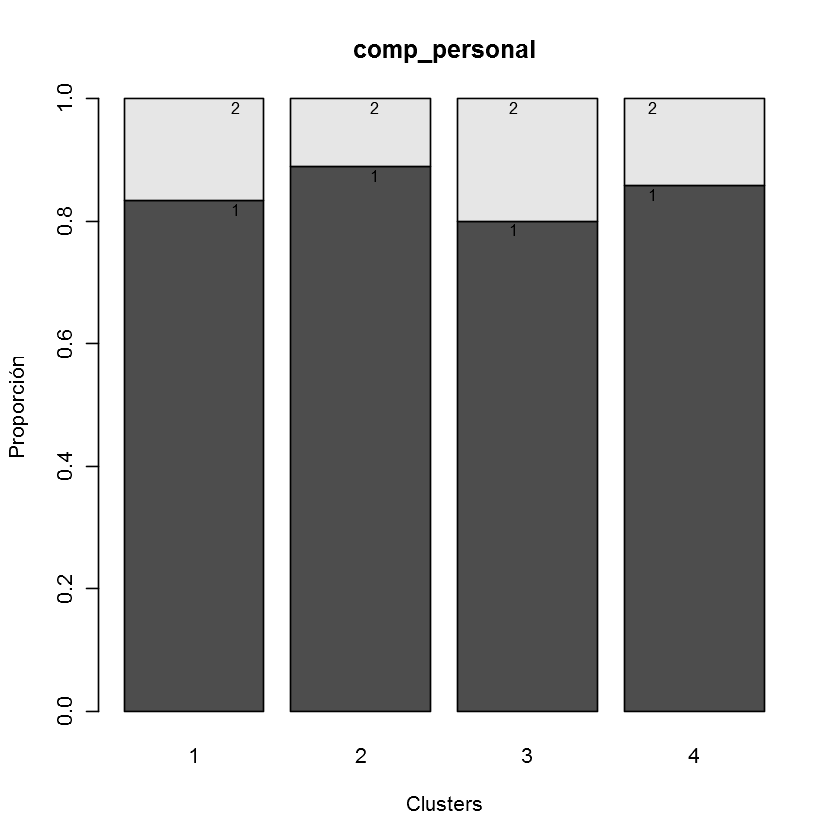

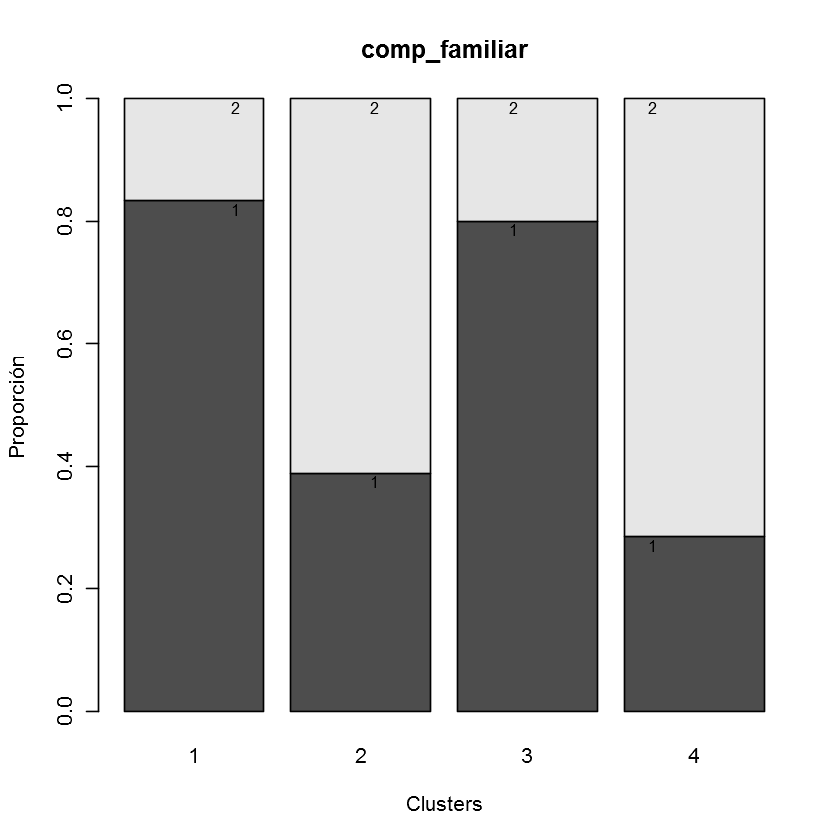

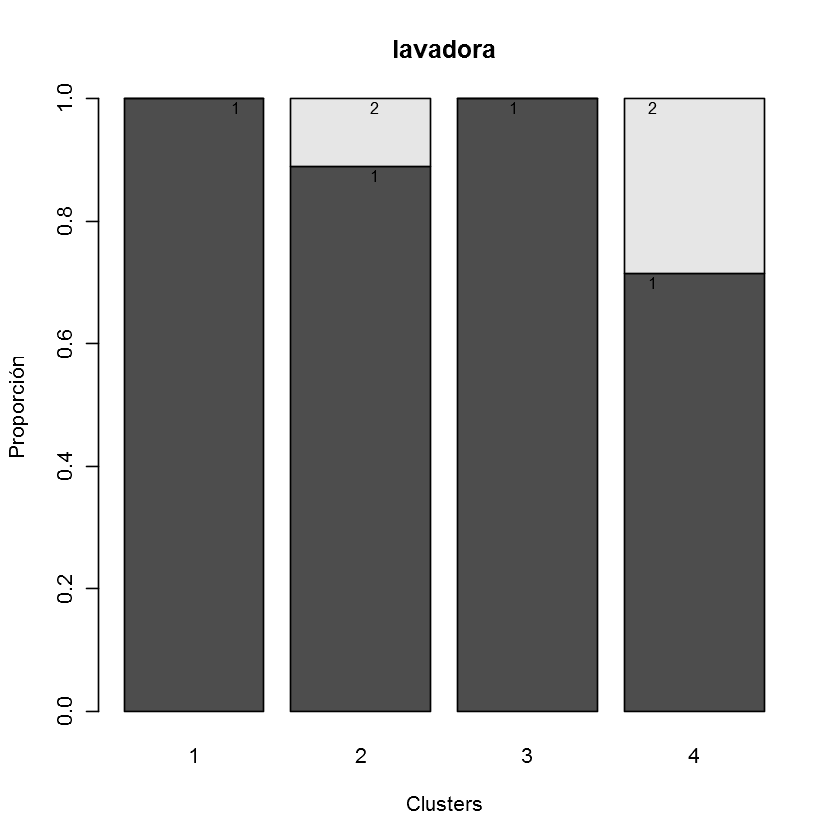

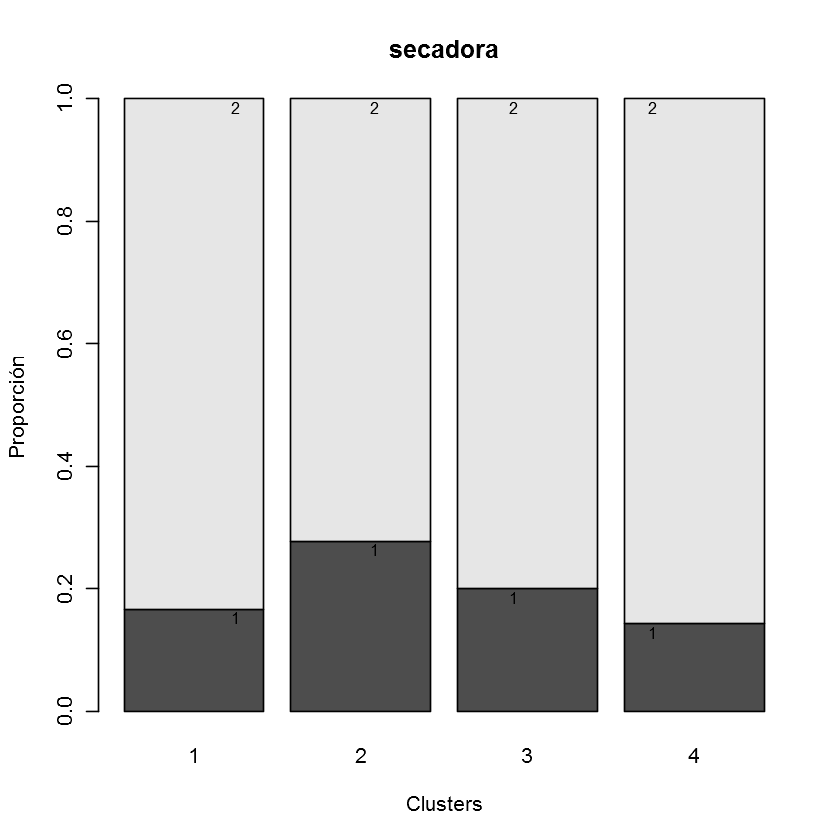

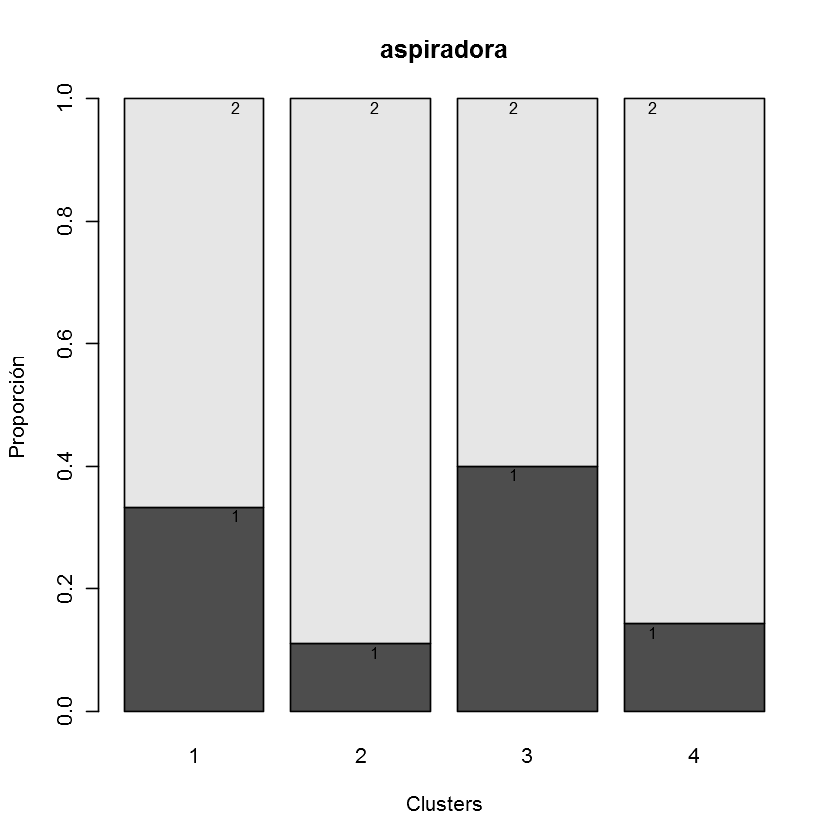

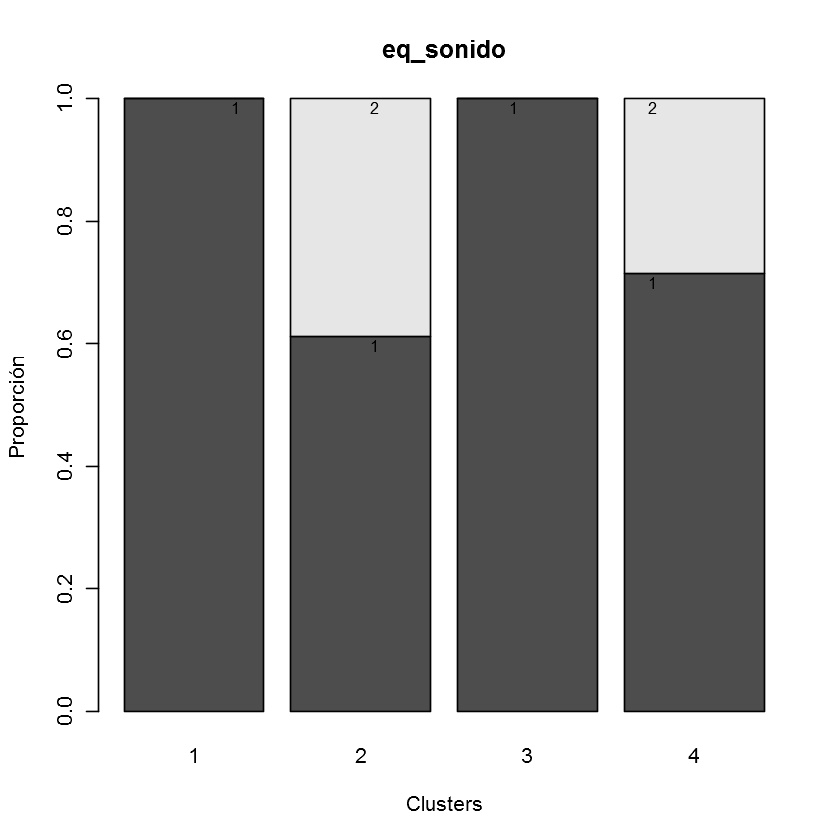

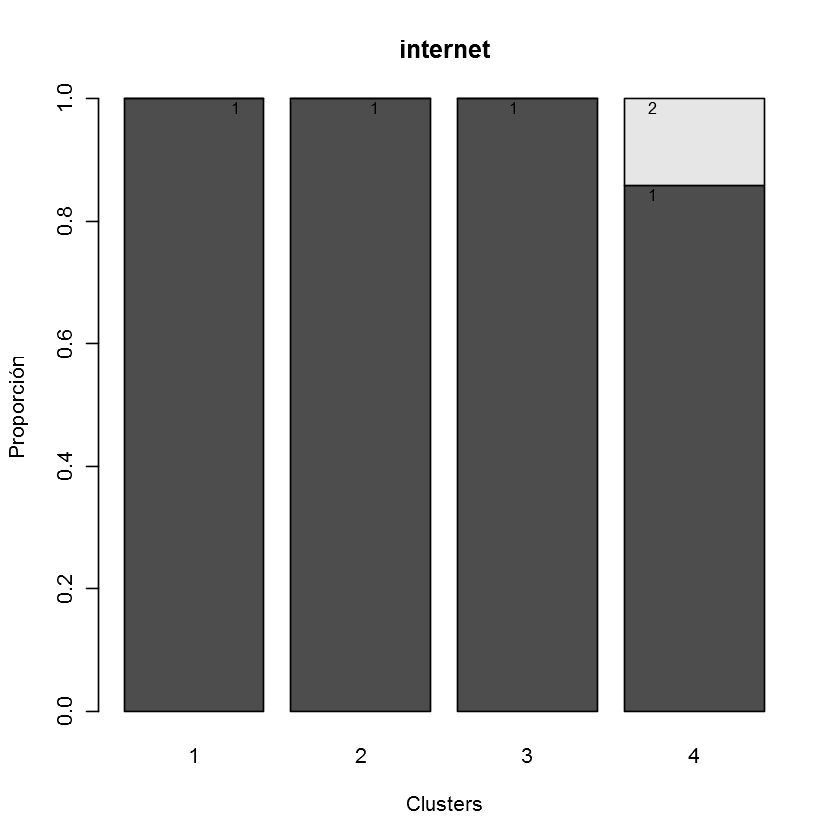

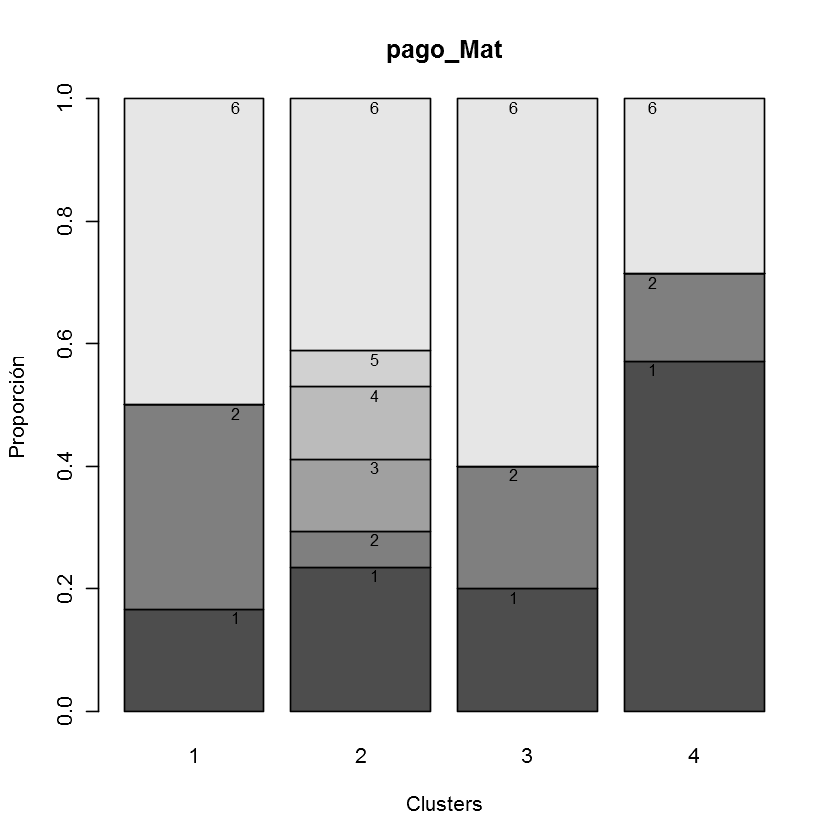

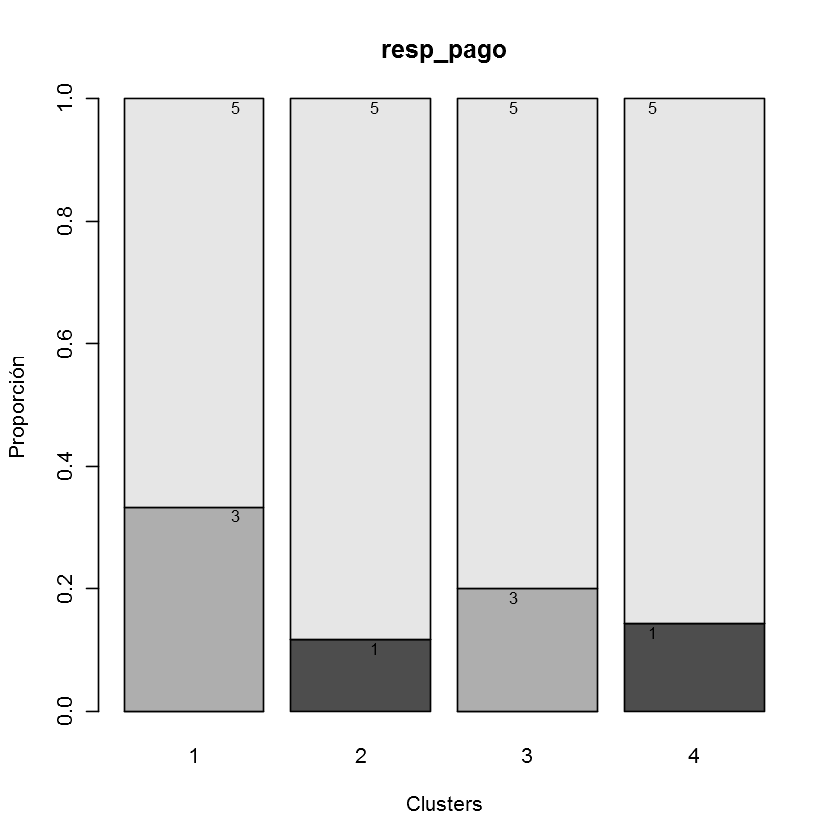

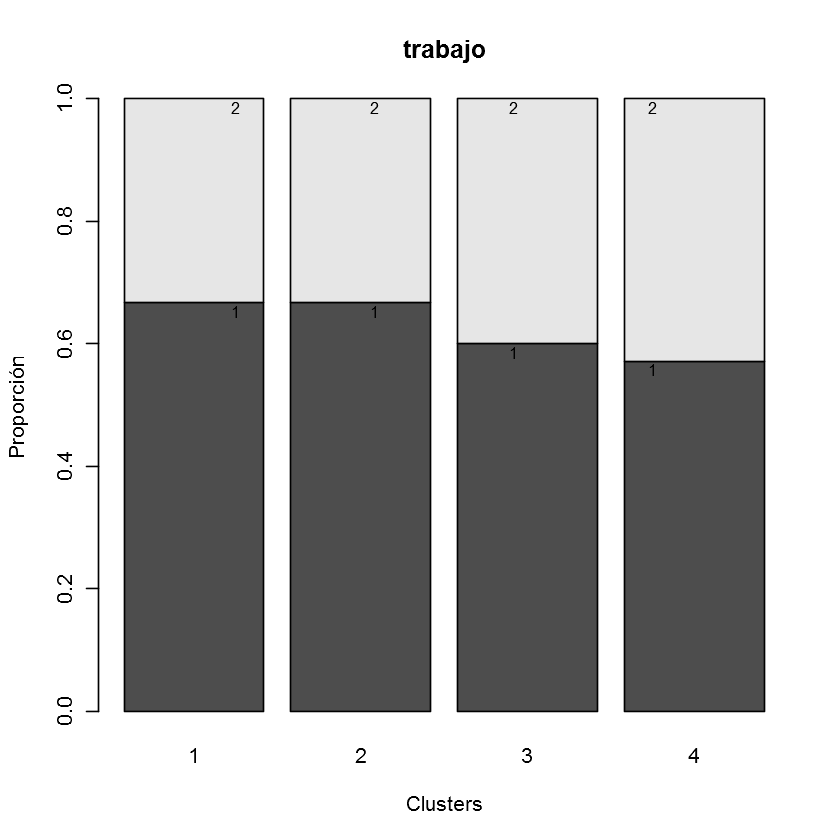

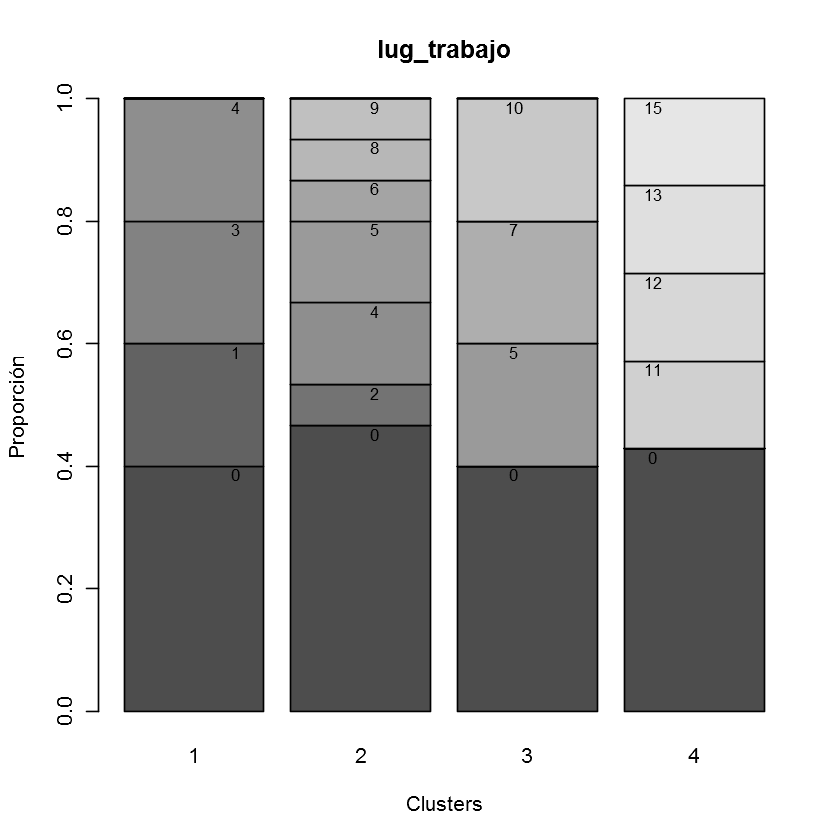

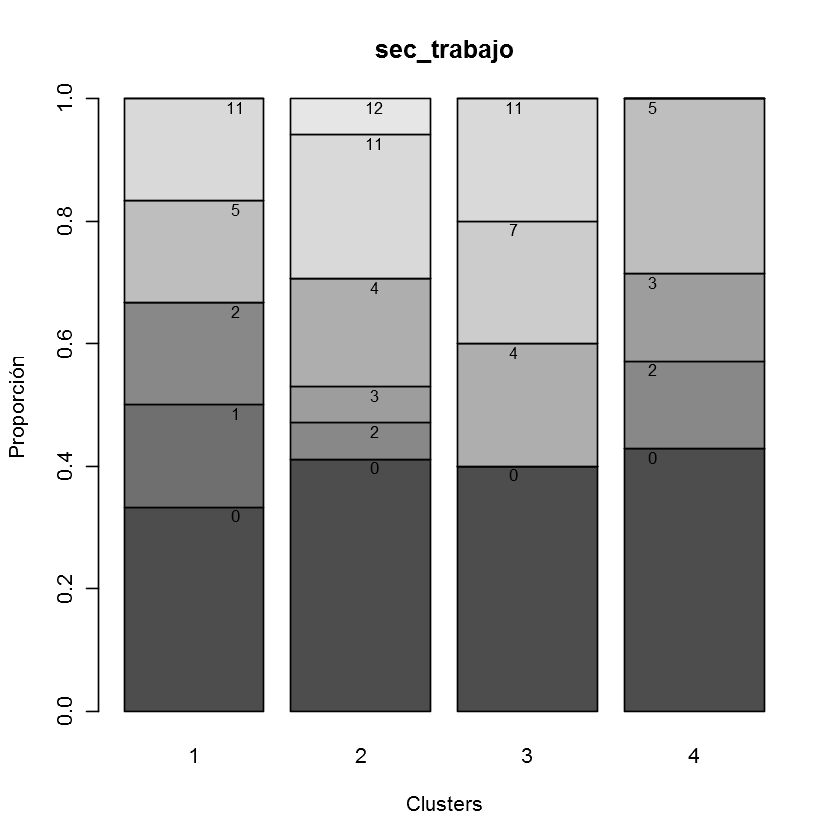

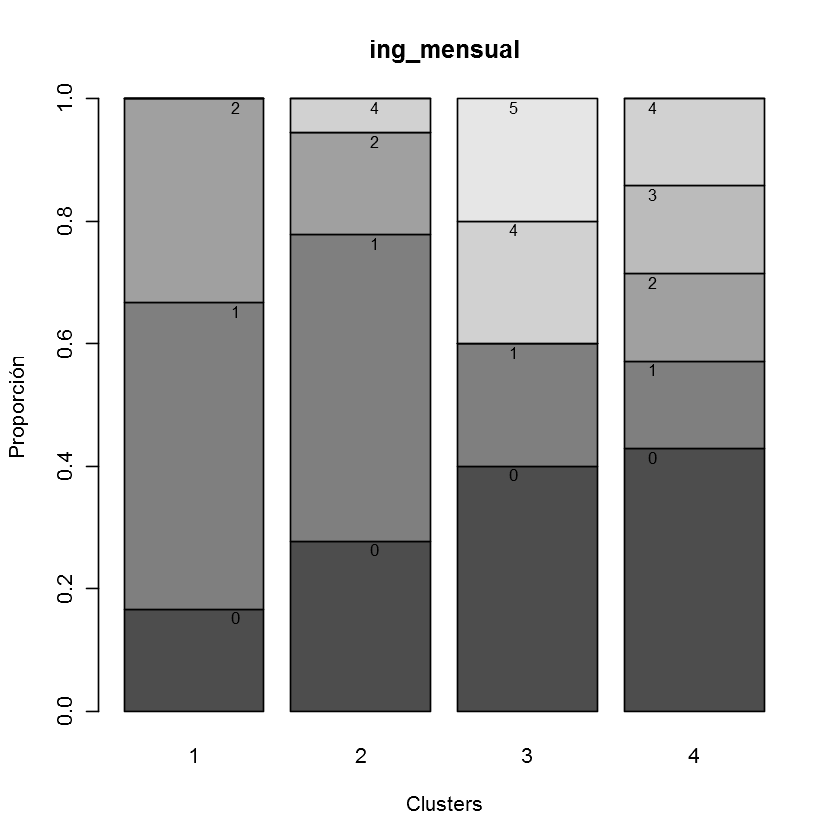

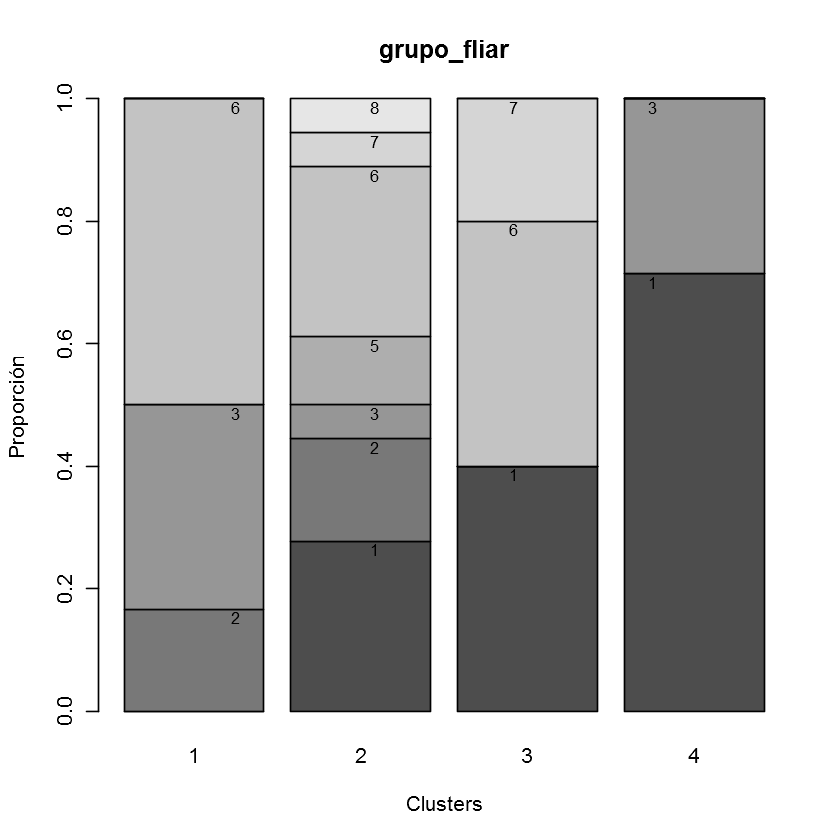

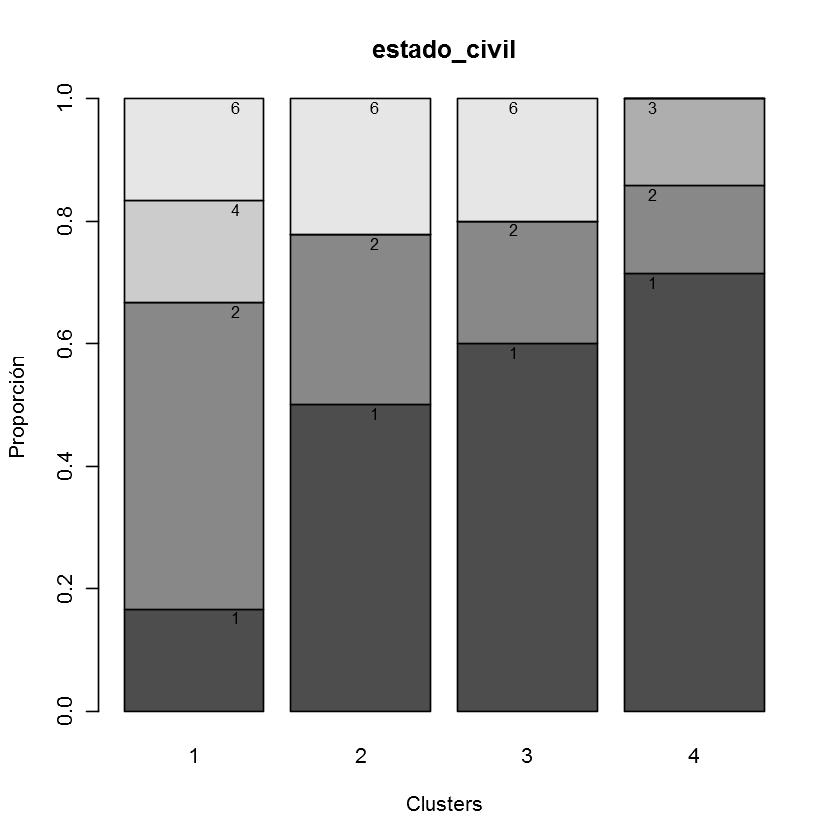

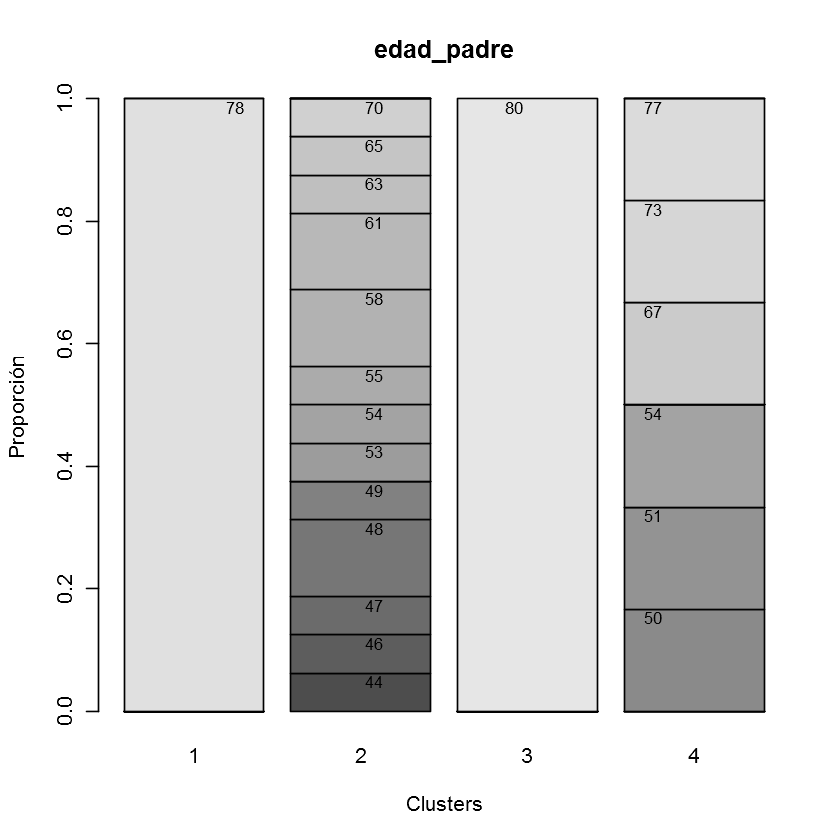

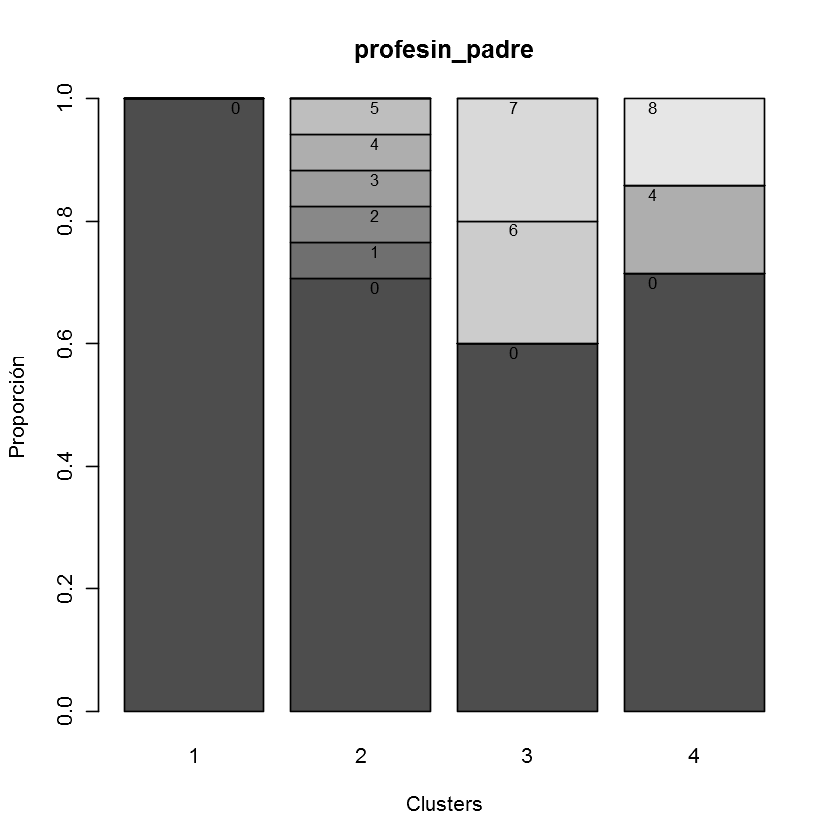

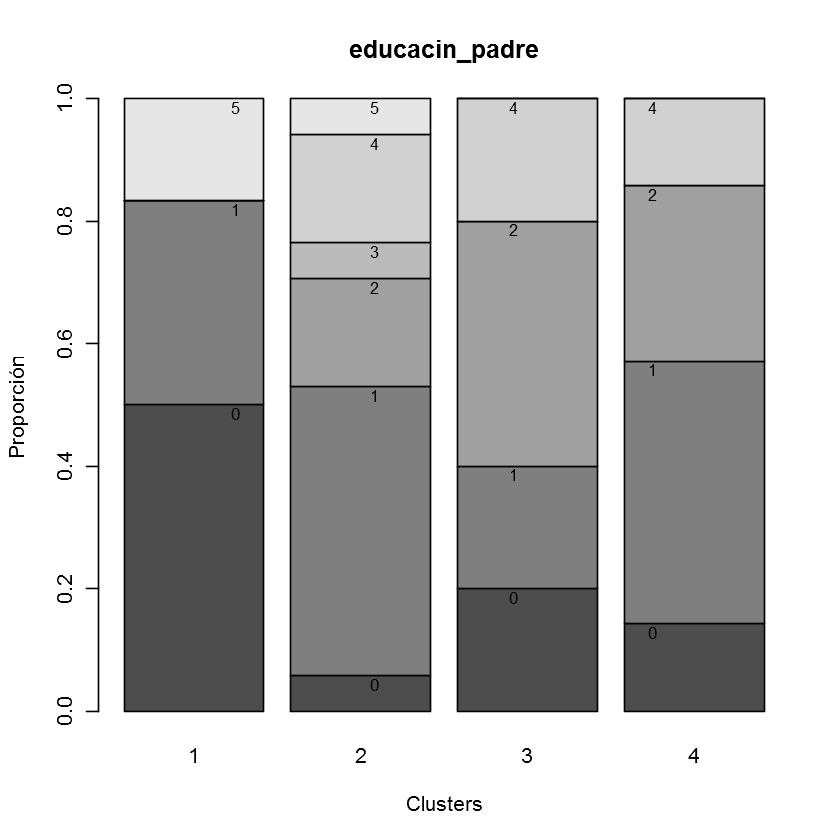

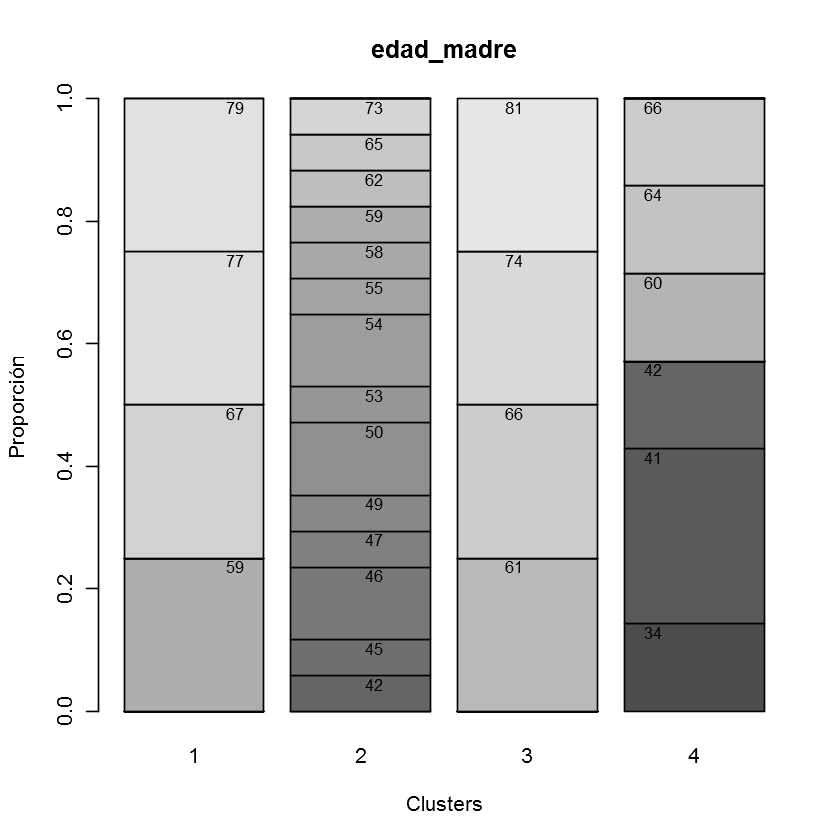

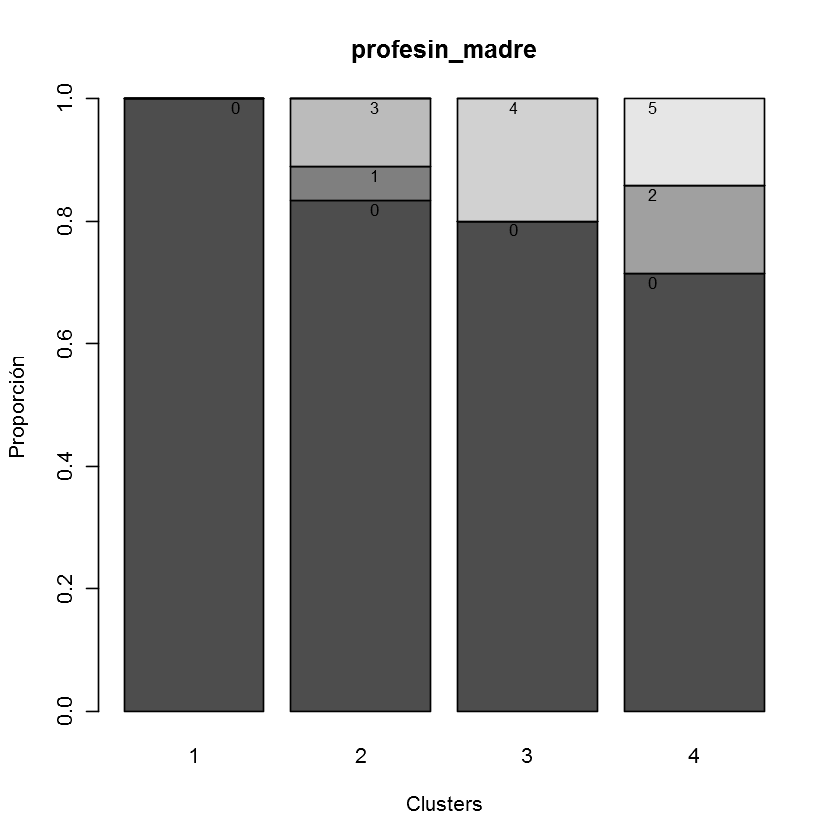

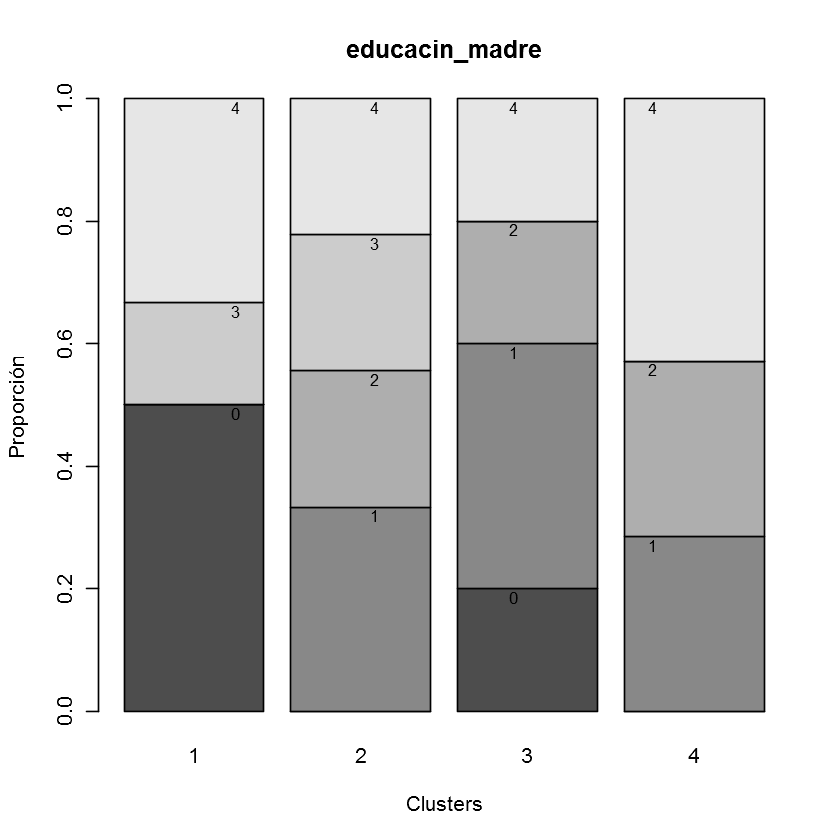

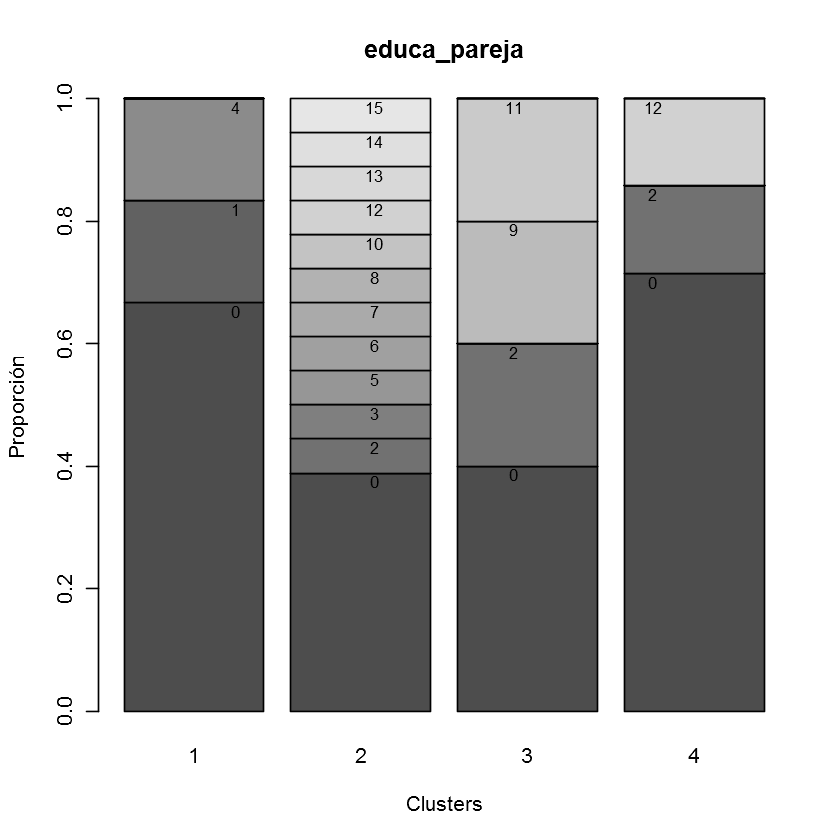

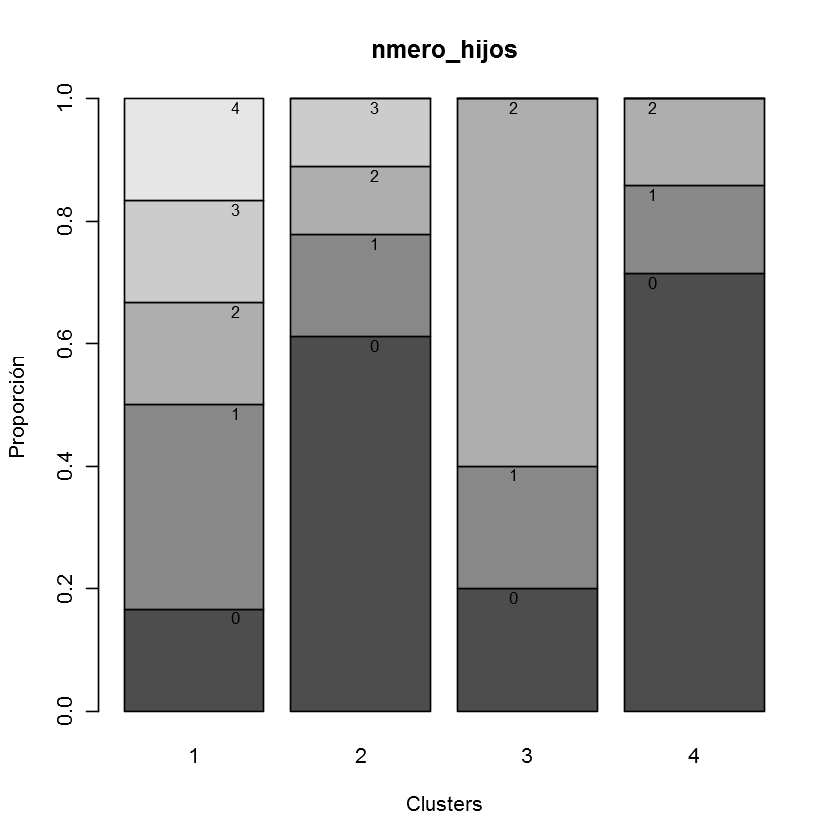

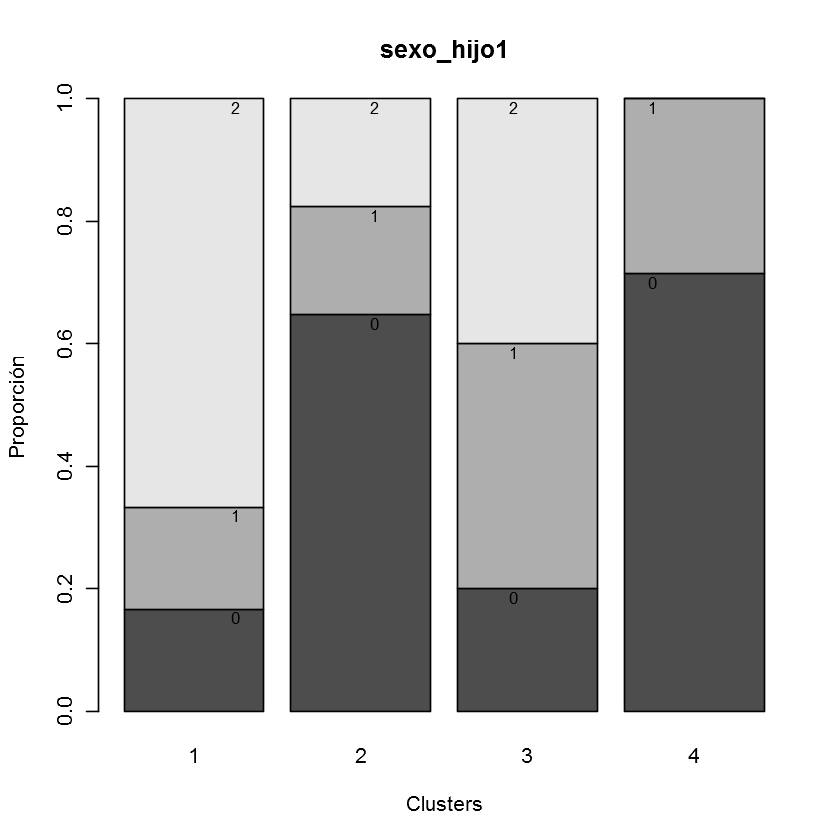

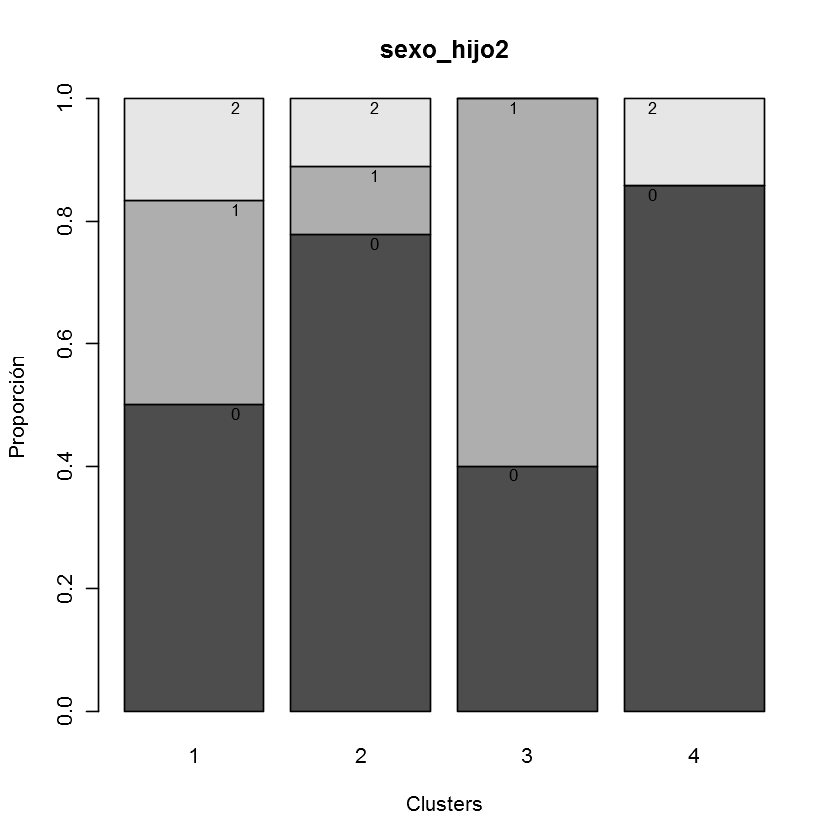

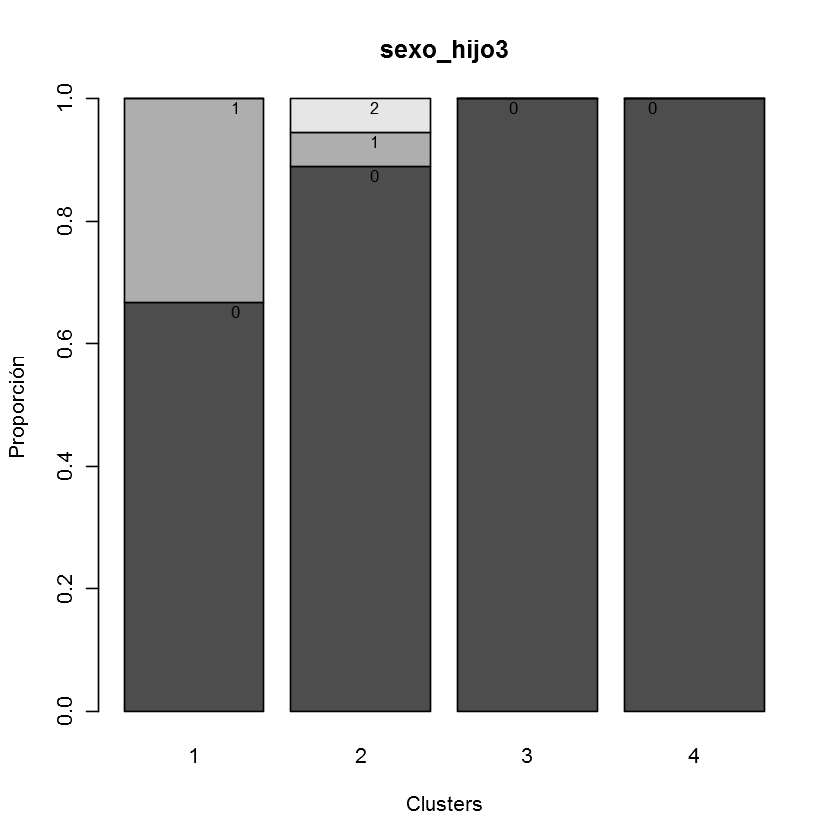

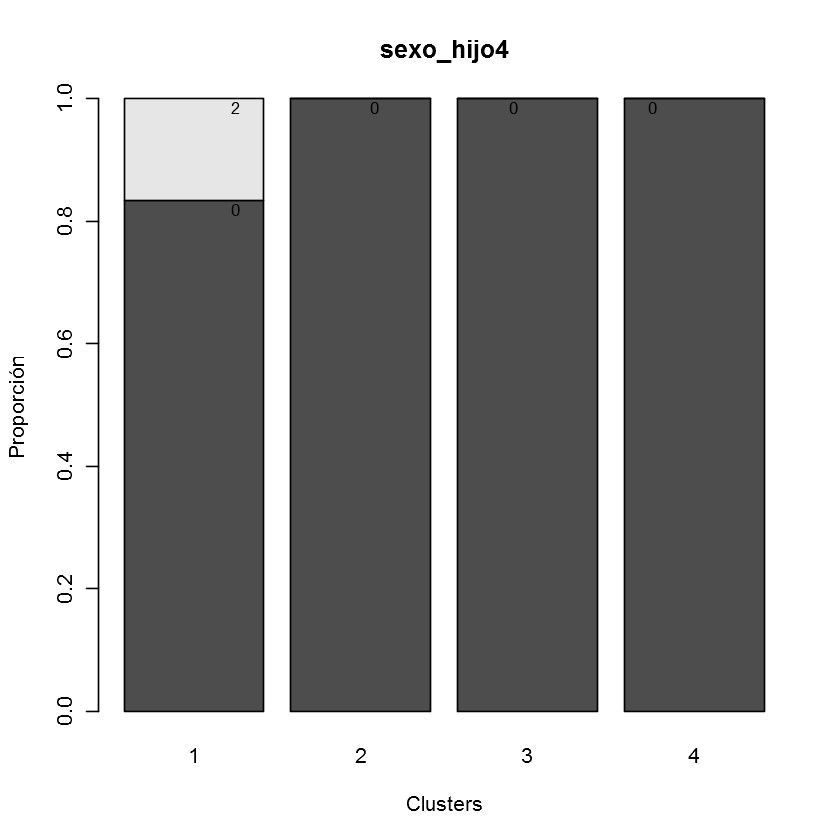

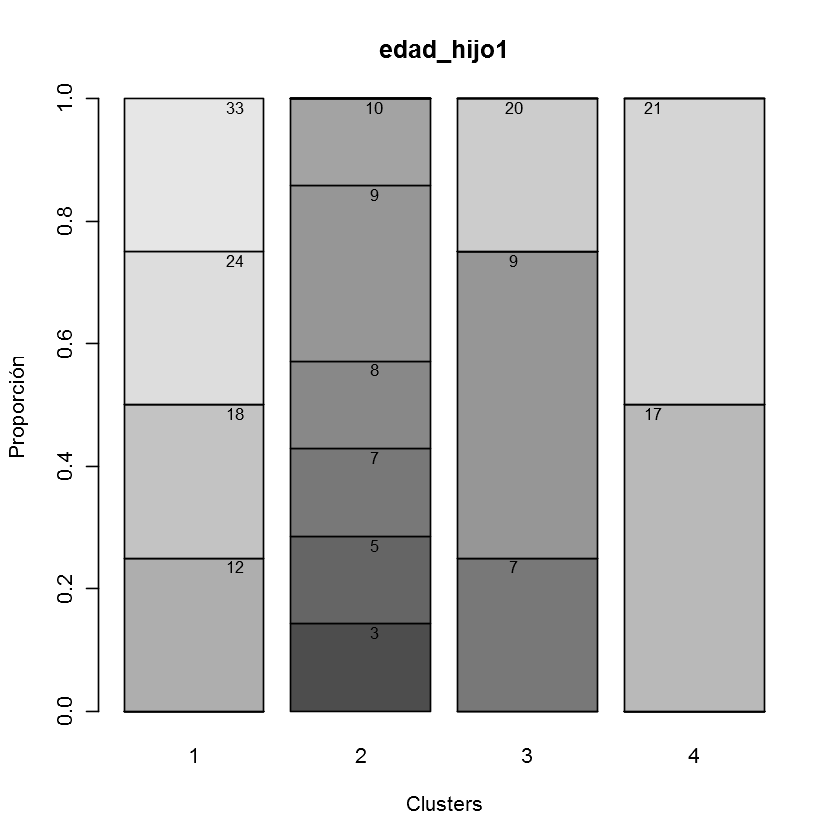

ERROR: Error in if (data_table[dat, clust] > 0) {: valor ausente donde TRUE/FALSE es necesario


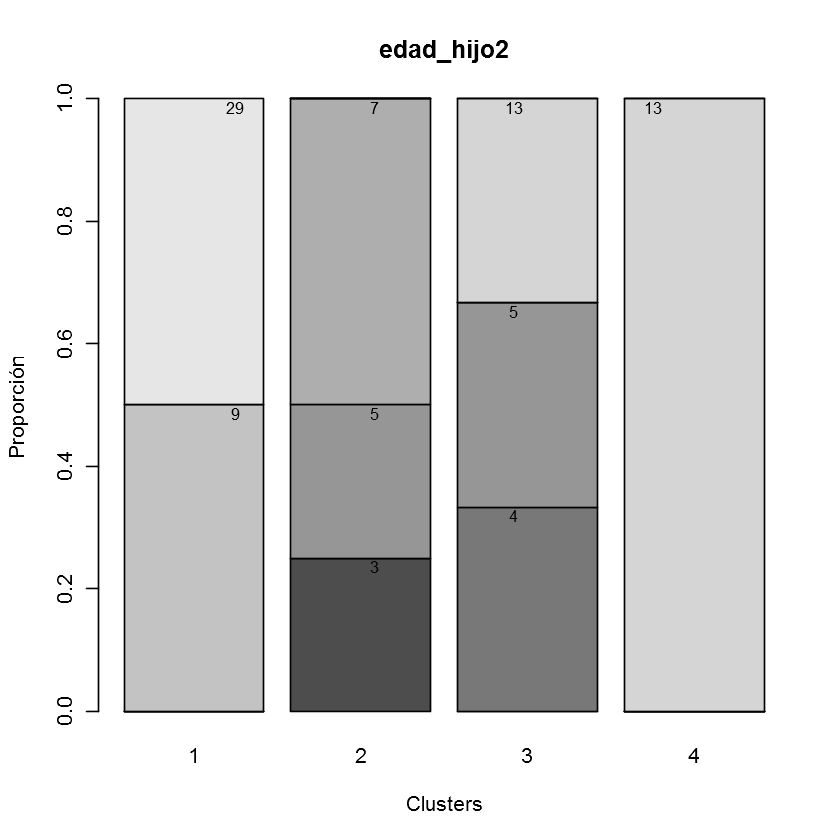

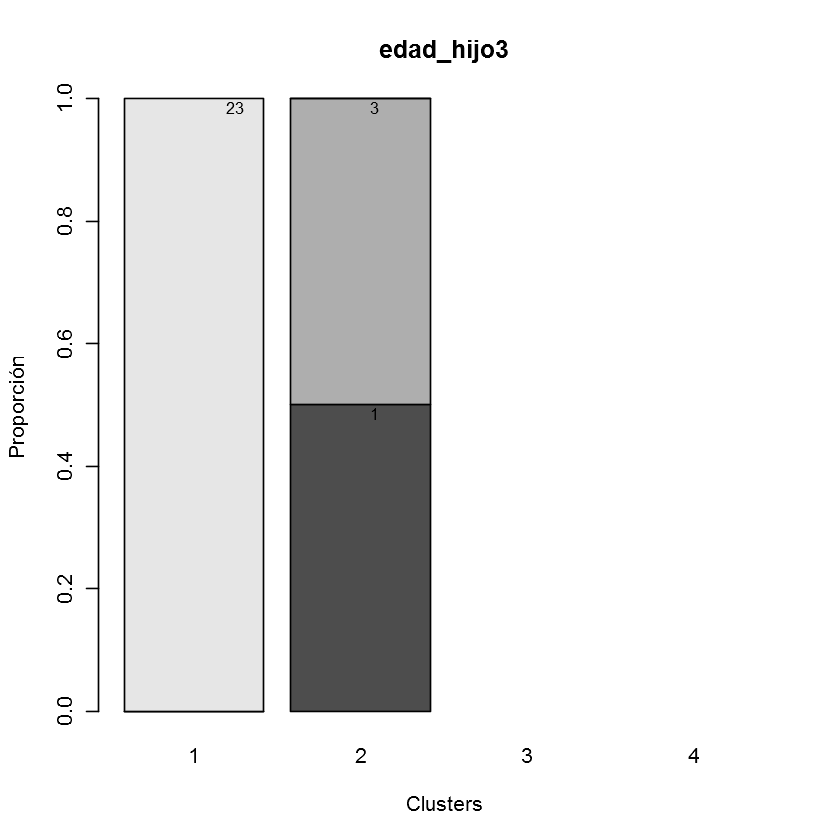

In [8]:
for (i in 1:ncol(test1)){
    data=test1[,i]
    data_table=prop.table(table(test1[,i],groups),2)
    #bp=barplot(data_table,main=varnames[i],xlab="Clusters",ylab="Proporción")
    bp=barplot(data_table,main=colnames(test1)[i],xlab="Clusters",ylab="Proporción")
    for (clust in 1:4){
        yval=0
        for (dat in 1:nrow(data_table)){
            if (data_table[dat,clust]>0){
                yval=yval+data_table[dat,clust]
                #print(c(clust,yval))
                text(clust,yval-0.015,rownames(data_table)[dat], cex=0.8)
            }
        }
    }
}
#summary(test1)

## Perfiles para las variables prioridad

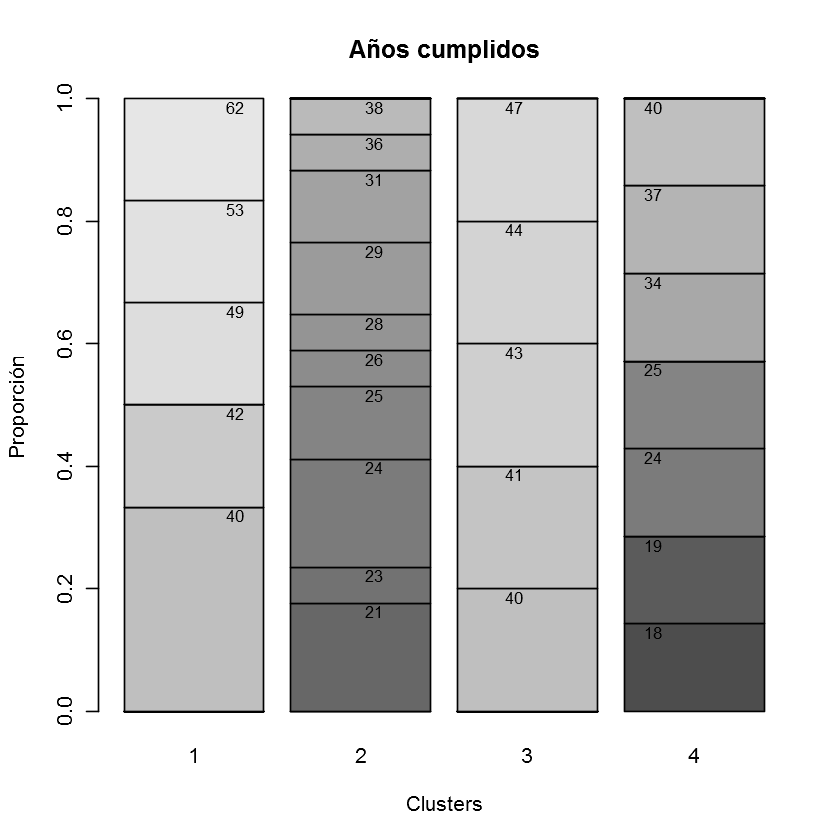

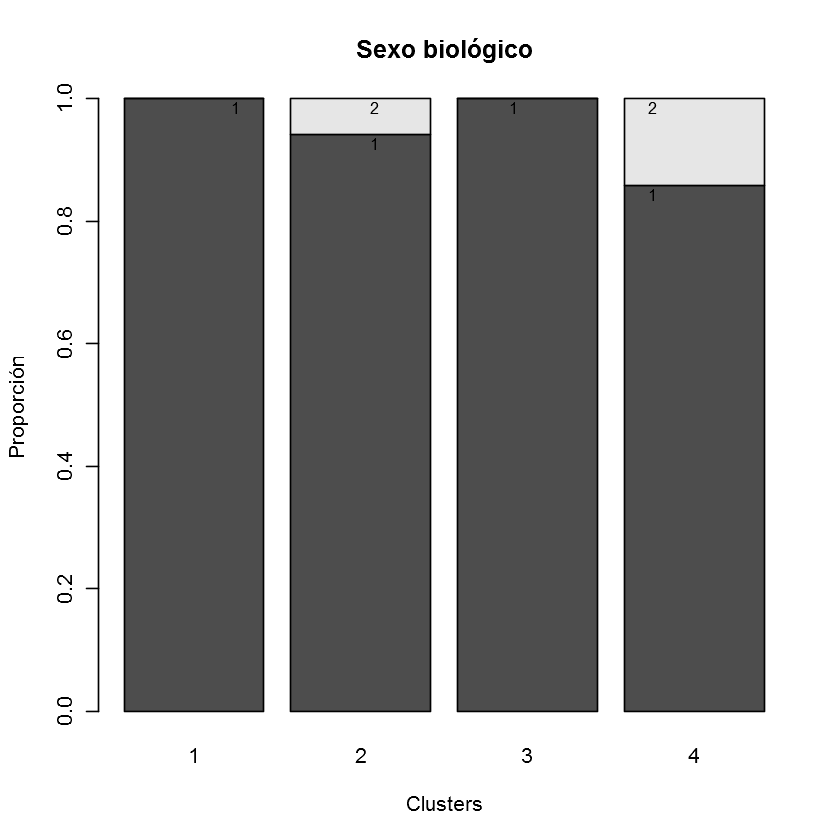

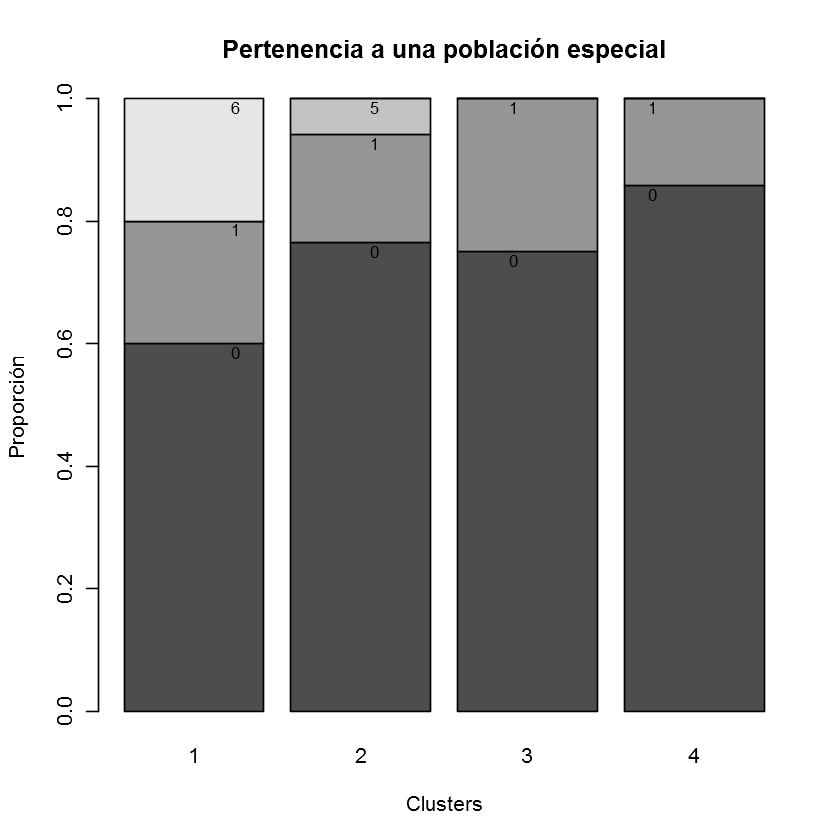

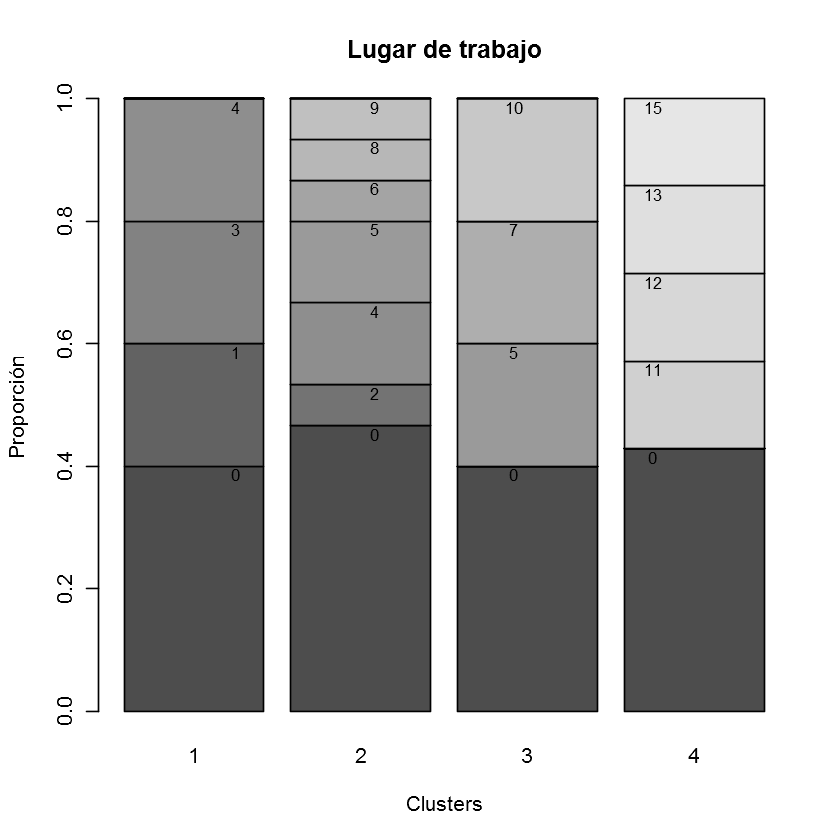

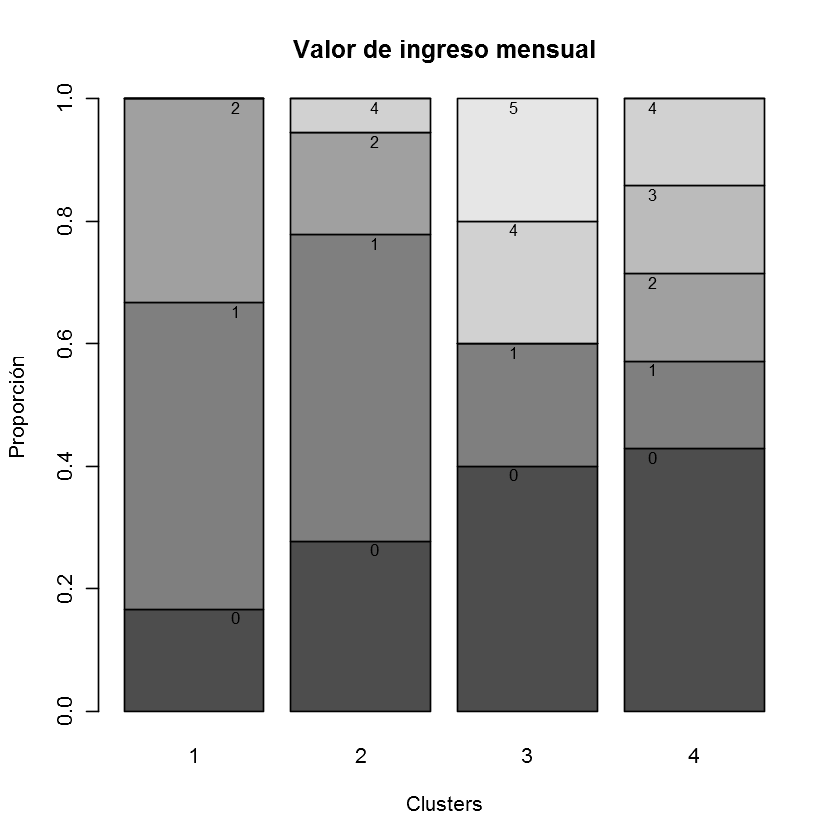

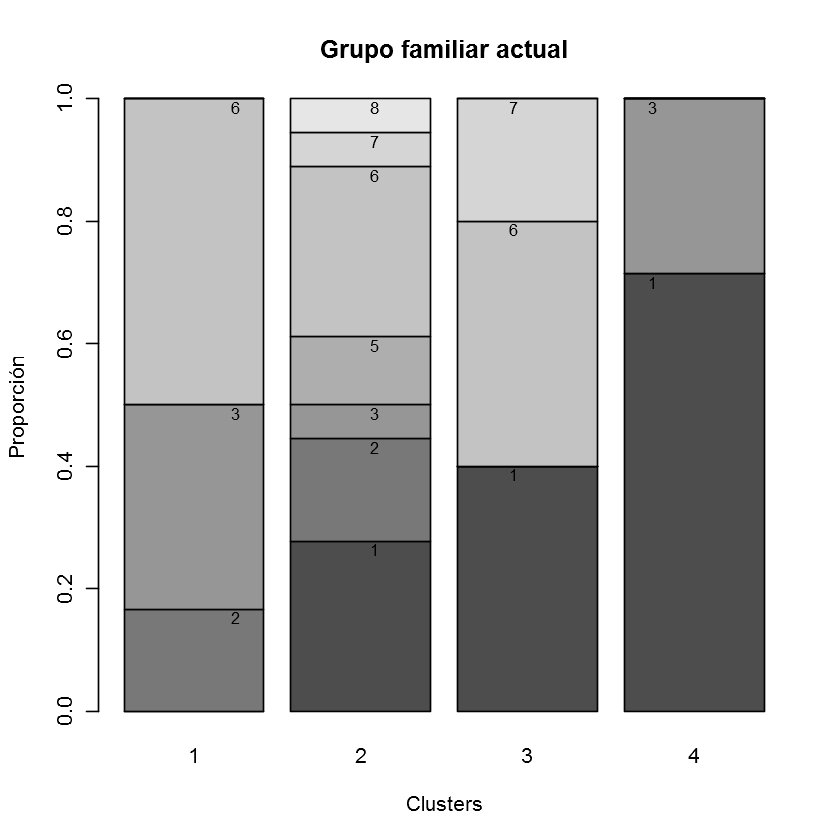

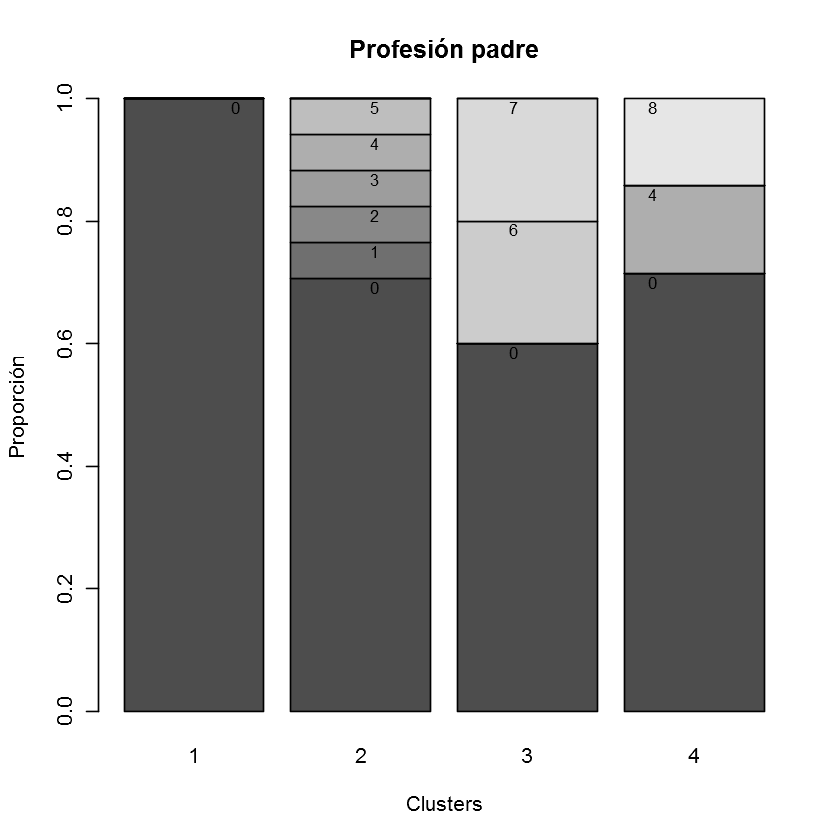

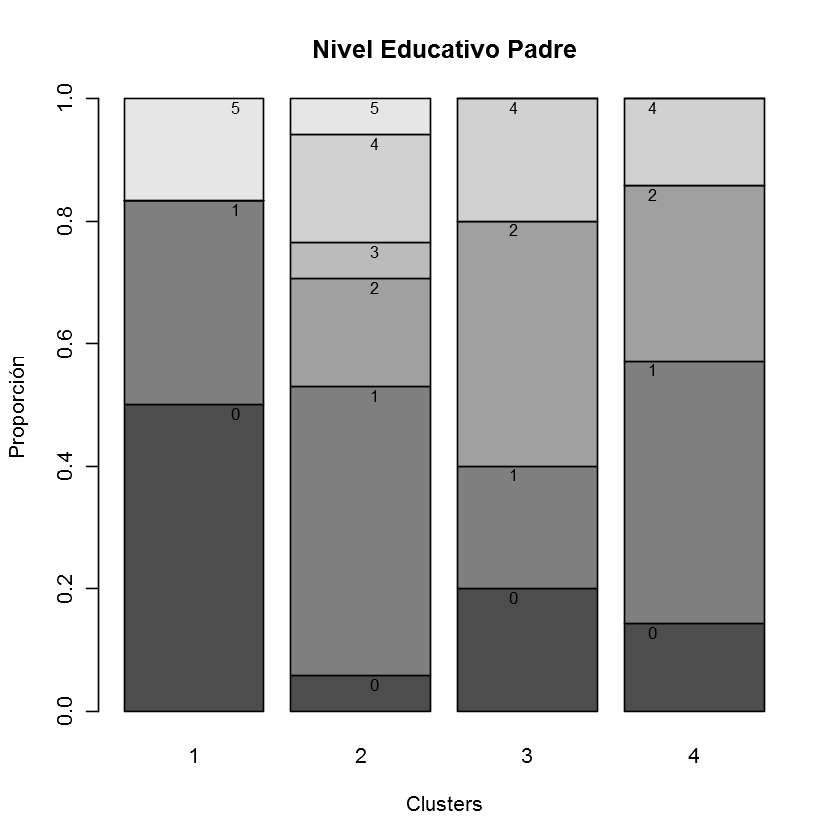

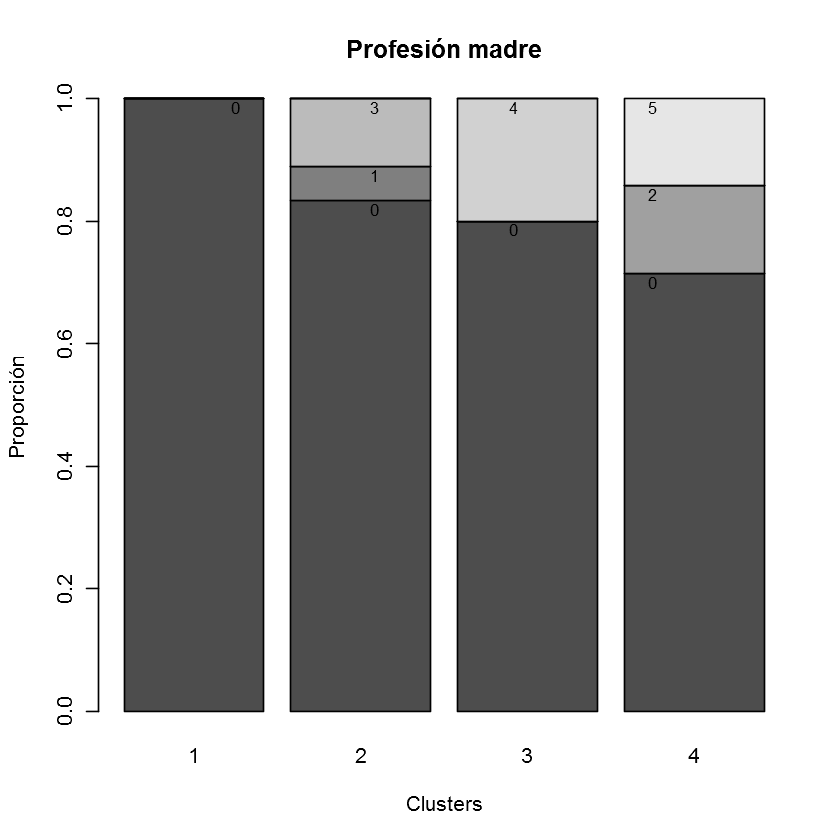

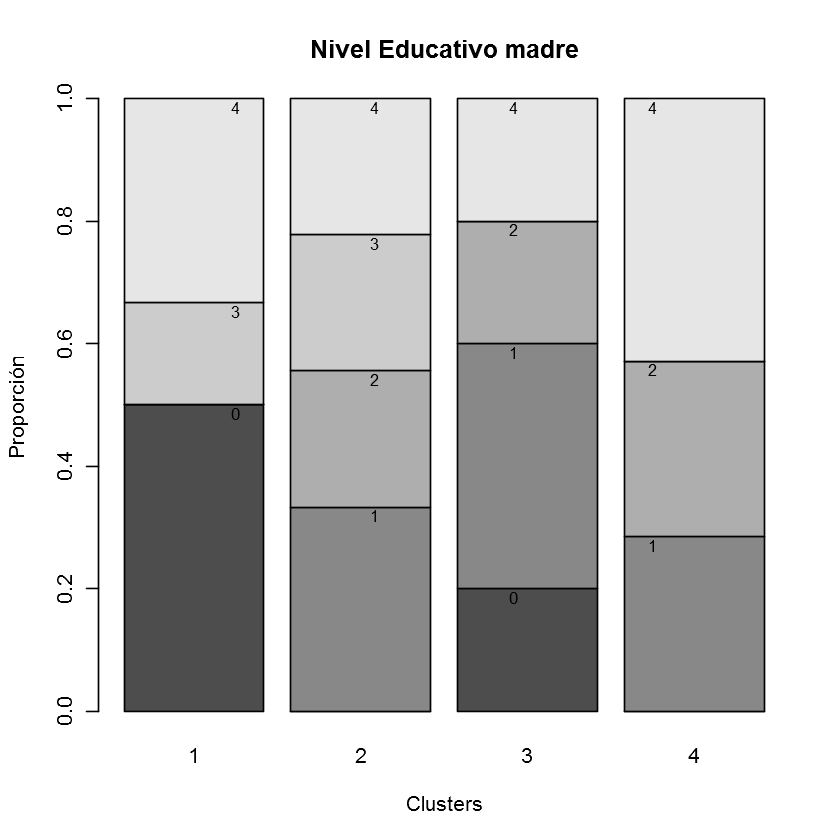

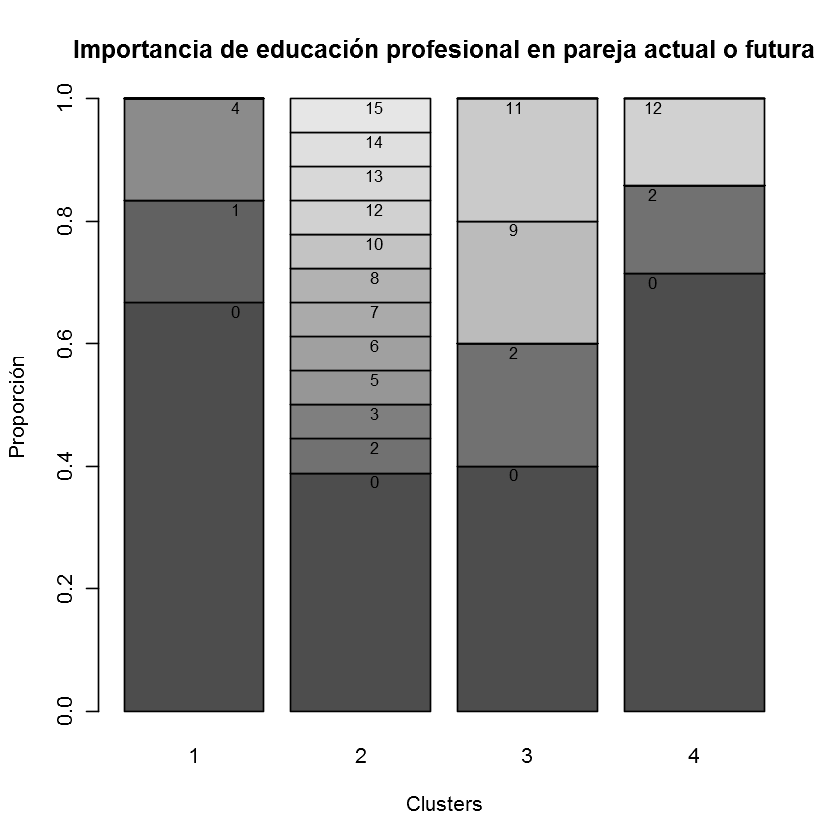

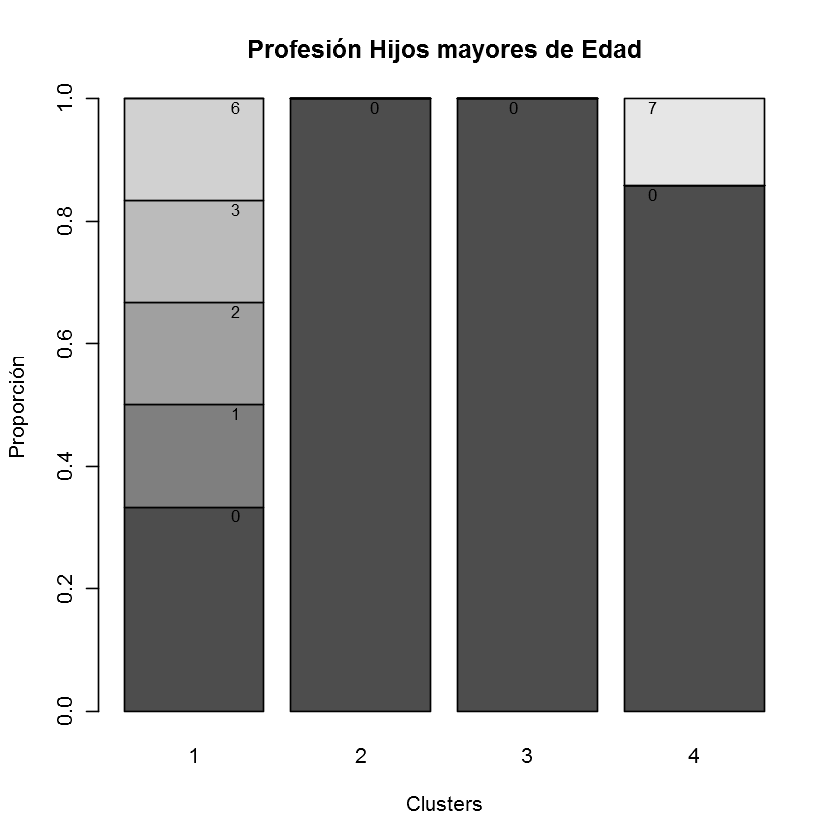

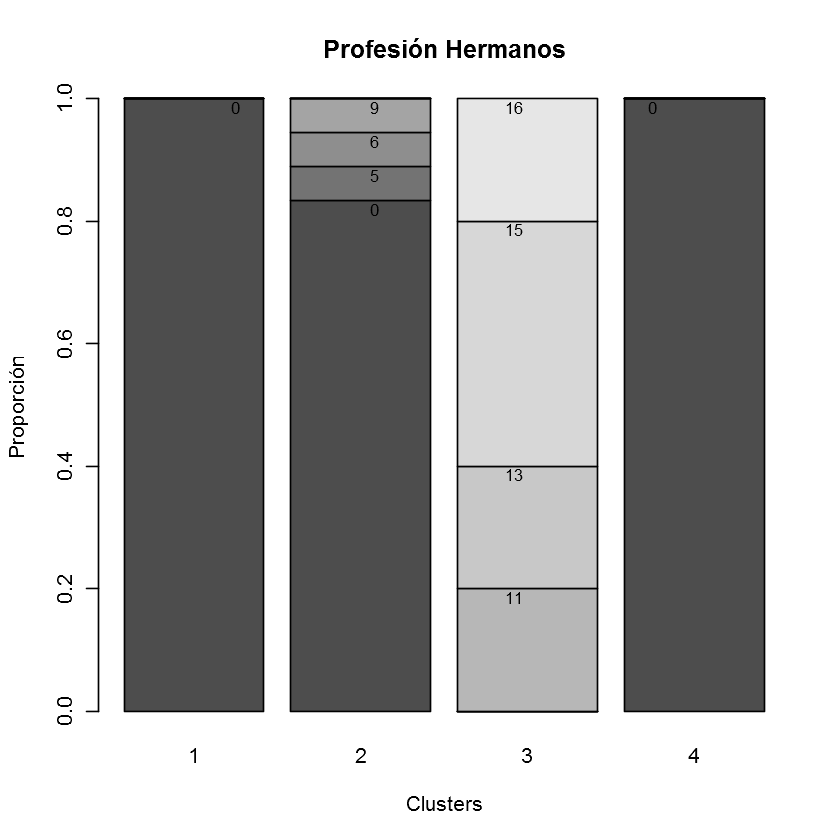

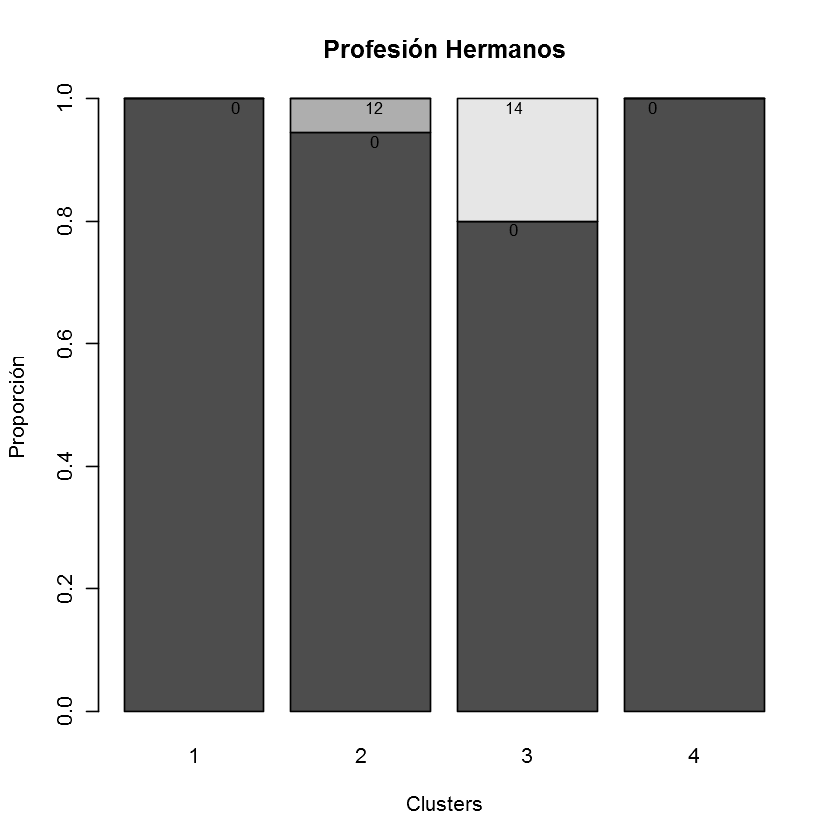

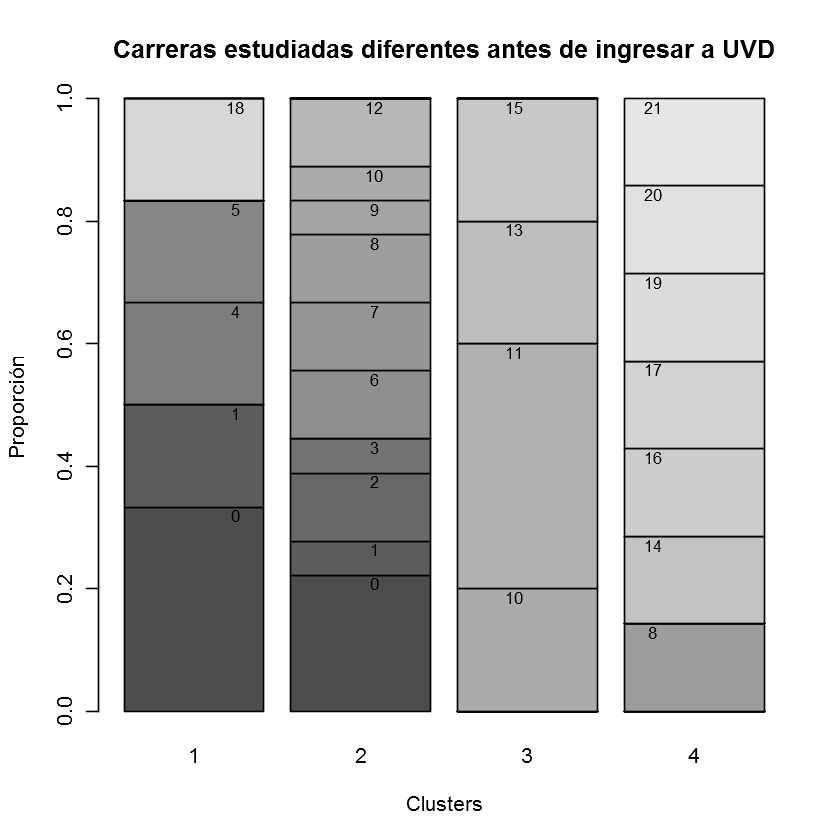

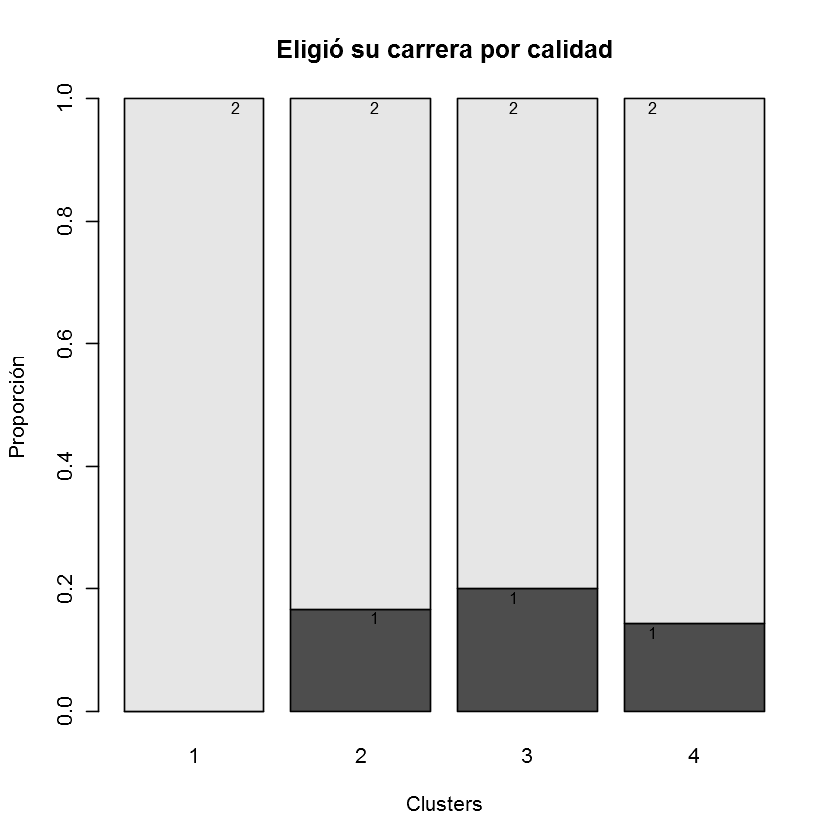

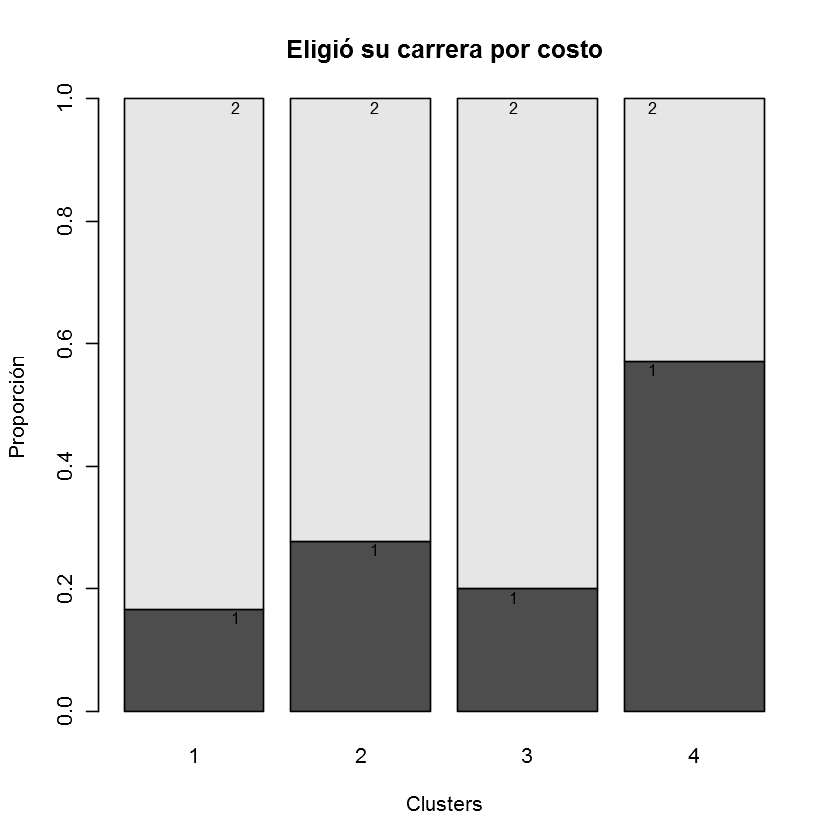

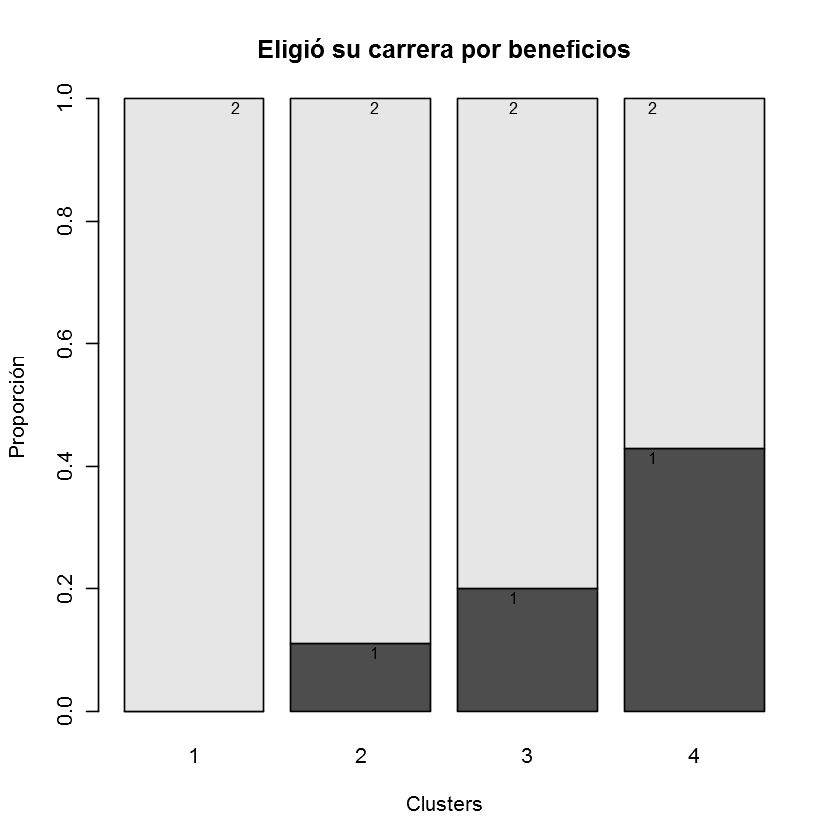

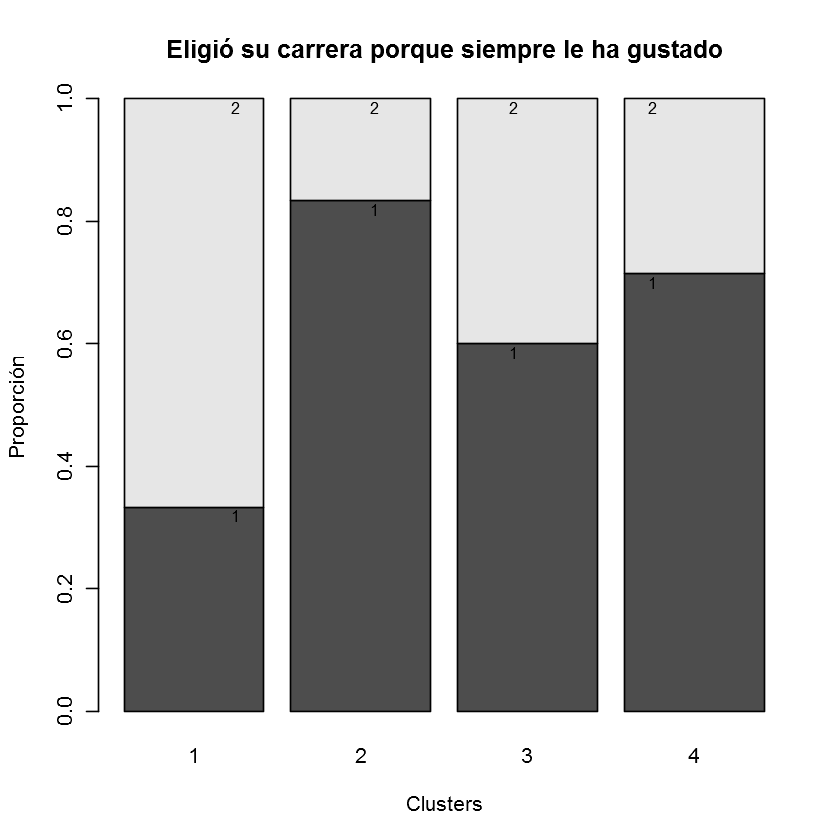

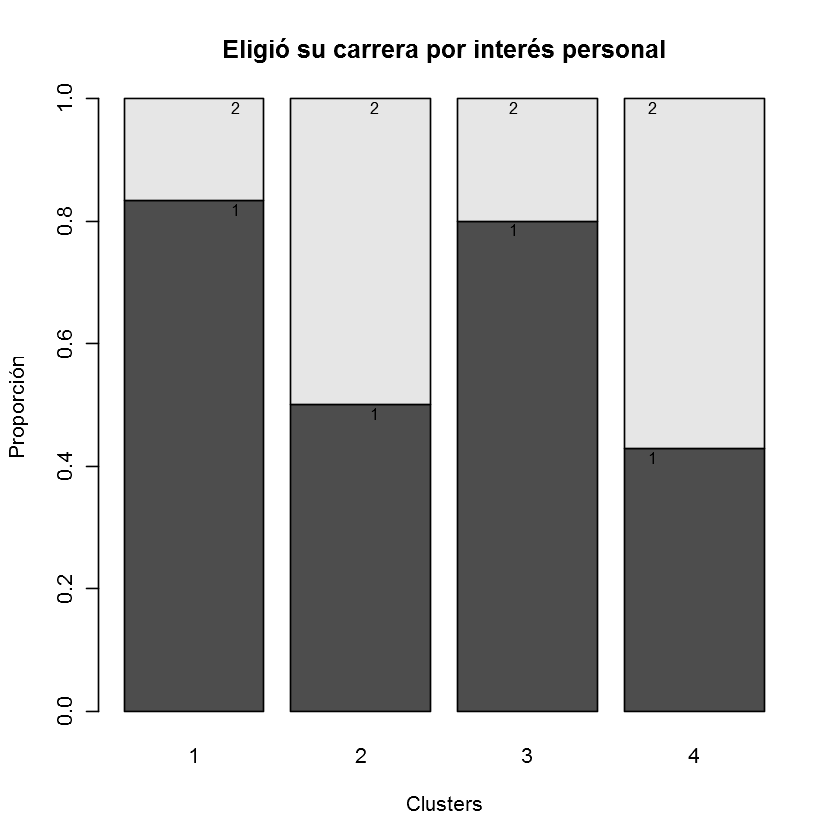

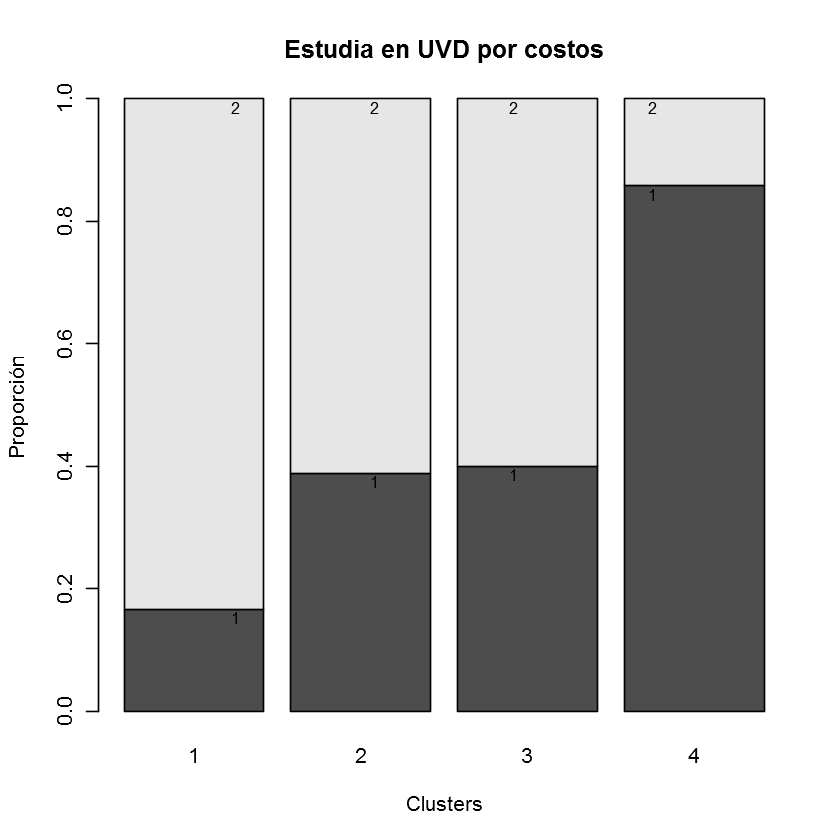

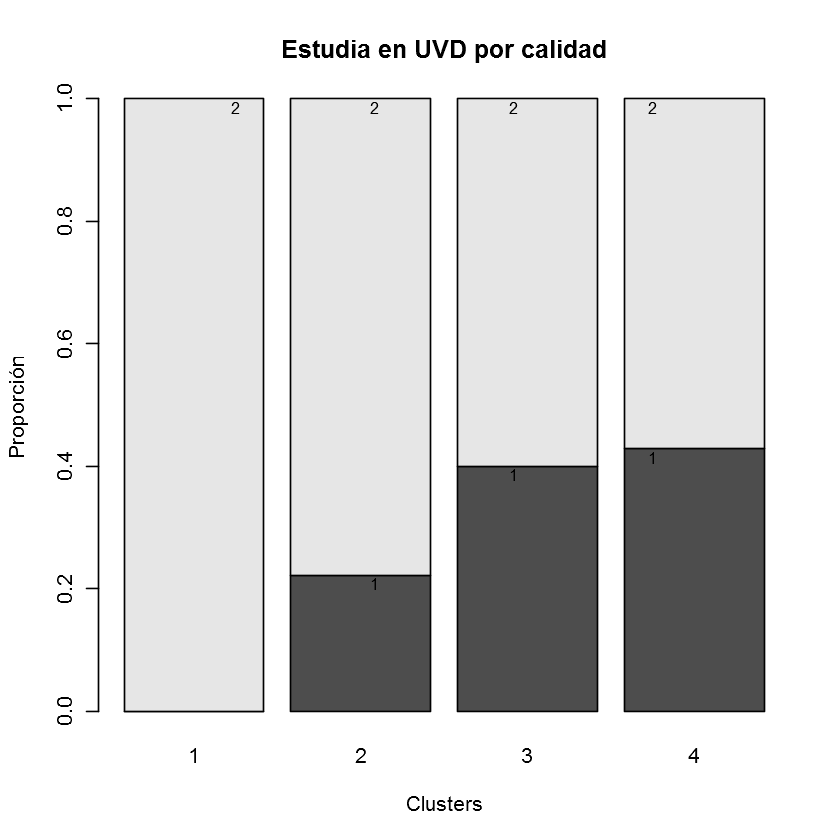

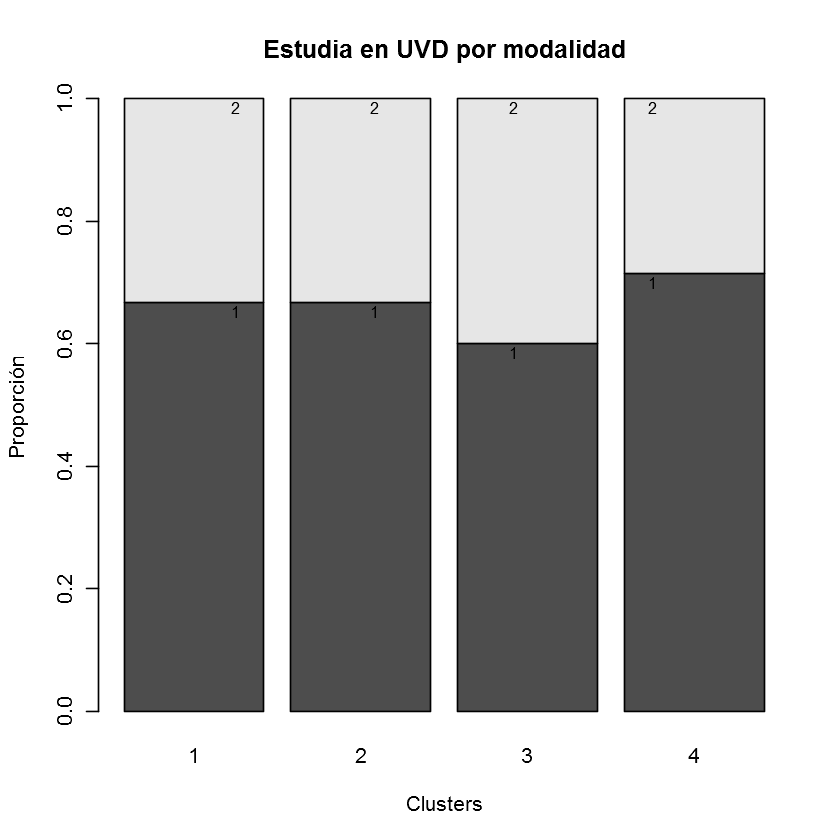

In [9]:
for (i in 1:ncol(test2)){
    data=test2[,i]
    data_table=prop.table(table(test2[,i],groups),2)
    #bp=barplot(data_table,main=varnames[i],xlab="Clusters",ylab="Proporción")
    bp=barplot(data_table,main=varnames[i],xlab="Clusters",ylab="Proporción")
    for (clust in 1:4){
        yval=0
        for (dat in 1:nrow(data_table)){
            if (data_table[dat,clust]>0){
                yval=yval+data_table[dat,clust]
                #print(c(clust,yval))
                text(clust,yval-0.015,rownames(data_table)[dat], cex=0.8)
            }
        }
    }
}
#summary(test1)

In [10]:
data_pca=test1
for (i in 1:ncol(test1)){
    vectr=test1[,i]
    #mode_vect=getmode(vectr[!is.na(vectr)])[1]
    mean_vect=mean(vectr[!is.na(vectr)])
    vectr[is.na(vectr)]=mean_vect#mode_vect
    data_pca[,i]=vectr
}
data_pca

,dep_origen,ciudad_municip,edad,sexo,sisbn,eps,enfermedades,poblacin_esp,dif_fsica_cog,cons_cigarrillo,...,temticas,mtodos_estudio,uso_internet,bsqueda_info,uso_biblioteca,costos,calidad,modalidad,ubicacin,horarios
1,5,0,49,1,0,4,0,0,0,1,...,1.89473684210526,1,2,2,2,1,2,1,2,1
2,5,6,40,1,0,3,2,1,0,1,...,2,2,1,2,2,2,2,2,2,1
3,4,5,21,1,0,1,0,0,0,2,...,1,2,2,1,2,1,1,1,2,1
4,1,1,25,1,0,4,0,0.515151515151515,0,1,...,2,1,2,2,2,2,2,1,2,2
5,5,11,62,1,0,2,0,6,1,1,...,2,1,2,2,2,2,2,2,1,2
6,1,1,31,1,0,2,0,0,2,1,...,2,1,2,2,2,1,1,1,1,1
7,2,4,40,1,0,4,1,0,0,1,...,1.89473684210526,1,2,2,2,2,2,1,2,2
8,1,1,42,1,0,2,0,0,0,1,...,1.89473684210526,2,2,2,1,2,2,1,2,1
9,1,1,23,1,0,3,0,0,0,1,...,1.89473684210526,1,2,1,2,1,1,1,1,1
10,5,16,26,1,0,4,0,0,0,1,...,1.89473684210526,2,2,1,2,2,2,2,2,1


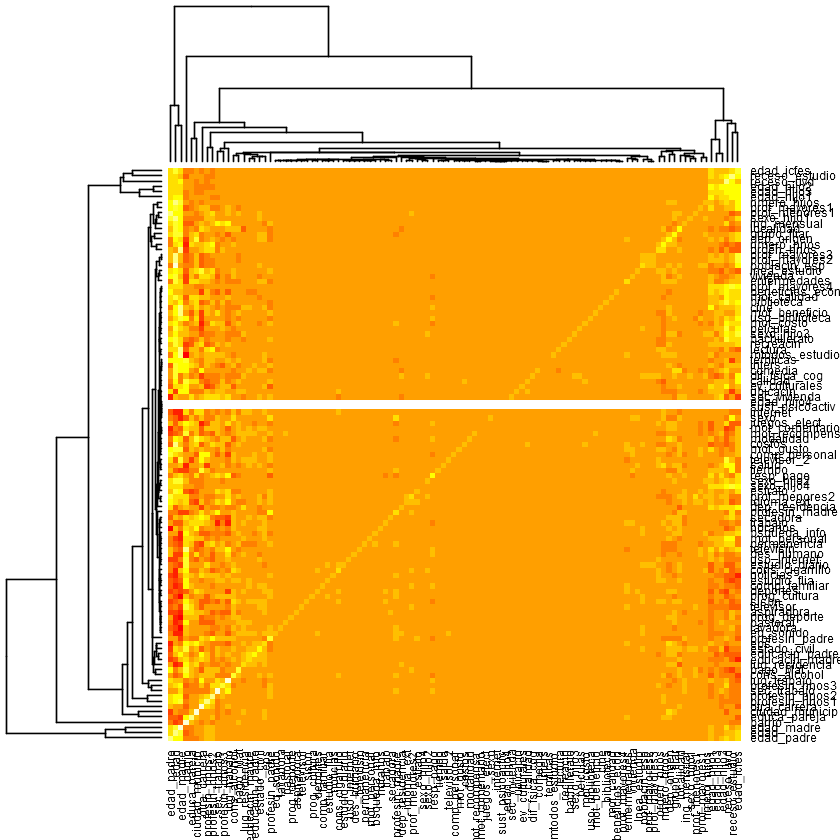

In [11]:
heatmap(cov(data_pca))

In [12]:
km_test3=kmeans(x = data_pca,centers=4,iter.max=25,nstart=100)
print (names(km_test3))
km_test3

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


K-means clustering with 4 clusters of sizes 12, 21, 1, 2

Cluster means:
  dep_origen ciudad_municip     edad     sexo     sisbn      eps enfermedades
1   2.666667       3.833333 41.25000 1.000000 0.1666667 3.181373    1.0000000
2   2.285714       4.380952 25.76054 1.097959 0.1428571 3.198880    0.1904762
3   5.000000       0.000000 49.00000 1.000000 0.0000000 4.000000    0.0000000
4   5.000000       8.500000 51.00000 1.000000 0.0000000 2.500000    1.0000000
  poblacin_esp dif_fsica_cog cons_cigarrillo cons_alcohol sust_psicoactiv
1    0.3358586    0.00000000        1.333333     3.500000               1
2    0.3578644    0.09931973        1.397279     3.442177               1
3    0.0000000    0.00000000        1.000000     1.000000               1
4    3.5000000    0.50000000        1.000000     1.500000               1
  vivienda sec_vivienda estrato dep_residencia lug_residencia localidad
1 2.500000     1.916667 3.00000        1.00000       1.000000  4.083333
2 2.047619     1.899160

## Principal Component Analysis

https://www.r-bloggers.com/computing-and-visualizing-pca-in-r/

Handbook of data analysis R
https://cran.r-project.org/web/packages/HSAUR/vignettes/Ch_principal_components_analysis.pdf

In [13]:
test.pca <- prcomp(data_pca, center = TRUE, scale. = TRUE) 
names(test.pca)
#print((test.pca$sdev/sum(test.pca$sdev)),type="l")
plot((test.pca$sdev/sum(test.pca$sdev)),type="l")
sum((test.pca$sdev/sum(test.pca$sdev))[1:10])
plot(cumsum((test.pca$sdev/sum(test.pca$sdev))),type="l")

ERROR: Error in prcomp.default(data_pca, center = TRUE, scale. = TRUE): cannot rescale a constant/zero column to unit variance


In [14]:
plot(test.pca$x, col=groups,pch=16, main="Cluster dendrograma")
plot(test.pca$x, col=km_test3$cluster,pch=16, main="Cluster kmeans")


ERROR: Error in plot(test.pca$x, col = groups, pch = 16, main = "Cluster dendrograma"): objeto 'test.pca' no encontrado


In [15]:
#scatterplot3d(test.pca$rotation[,1:3], col=groups ,pch=16, main="Cluster dendrograma")
scatterplot3d(test.pca$x[,1:3], pch=16,color=groups, main="Cluster dendrograma")

ERROR: Error in scatterplot3d(test.pca$x[, 1:3], pch = 16, color = groups, main = "Cluster dendrograma"): objeto 'test.pca' no encontrado


In [16]:
names(test.pca)
test.pca$x

ERROR: Error in eval(expr, envir, enclos): objeto 'test.pca' no encontrado


In [17]:
modas=matrix(ncol = 4,nrow = length(colnames(test3)))
colnames(modas)=c("Clust_1","Clust_2","Clust_3","Clust_4")
rownames(modas)=colnames(test3)
medias=modas

for(i in 1:max(groups)){
    print(paste("*************","Cluster",i,"*************"))
    for (j in 1:ncol(test3)){
        barplot(table(test3[groups==i,j]),main=colnames(test3)[j])
        modas[j,i]=getmode(test3[groups==i,j])
        medias[j,i]=mean(test3[groups==i,j])
    }
    print(summary(test3[groups==i,]))
    print(paste("*************","Cluster",i,"*************"))
}

ERROR: Error in is.data.frame(x): objeto 'test3' no encontrado


In [18]:
medias

ERROR: Error in eval(expr, envir, enclos): objeto 'medias' no encontrado


In [19]:
modas

ERROR: Error in eval(expr, envir, enclos): objeto 'modas' no encontrado
